# (1) Book

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Assignment\Association Rules\book.csv")

In [3]:
df.shape

(2000, 11)

In [4]:
df.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [5]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
df.describe()

ChildBks     YouthBks     CookBks     DoItYBks       RefBks  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean      0.423000     0.247500     0.43100     0.282000     0.214500   
std       0.494159     0.431668     0.49534     0.450086     0.410578   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       0.000000     0.000000     0.00000     0.000000     0.000000   
75%       1.000000     0.000000     1.00000     1.000000     0.000000   
max       1.000000     1.000000     1.00000     1.000000     1.000000   

            ArtBks      GeogBks     ItalCook    ItalAtlas      ItalArt  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.241000     0.276000     0.113500     0.037000     0.048500   
std       0.427797     0.447129     0.317282     0.188809     0.214874   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Florence  
count  2000.000000  
mean      0.108500  
std       0.311089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Aprori Algorithm

**Set support value of 0.1**

In [8]:
frequent_items = apriori(df,min_support=0.1, use_colnames=True,verbose=1)
frequent_items

Processing 44 combinations | Sampling itemset size 4


support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (ItalCook, CookBks)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (GeogBks, DoItYBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (CookBks, YouthBks, ChildBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
31   0.1225    (RefBks, CookBks, ChildBks)
32   0.1265    (CookBks, ArtBks, ChildBks)
33   0.1495   (GeogBks, CookBks, ChildBks)
34   0.1045  (DoItYBks, GeogBks, ChildBks)
35   0.1020    (GeogBks, ArtBks, ChildBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, GeogBks, CookBks)
38   0.1035     (GeogBks, ArtBks, CookBks)

In [9]:
len(frequent_items)

39

## Model Building With different Threshold values

In [10]:
# Threshold = 0.2
model = association_rules(df= frequent_items ,metric = 'confidence', min_threshold= 0.2)
model

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95  (CookBks, GeogBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (CookBks, GeogBks)              0.2410   
99           (CookBks)   (ArtBks, GeogBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
3               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
96              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
98              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
99              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  

[100 rows x 9 columns]

In [11]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  \
78   (ArtBks, ChildBks)   (GeogBks)              0.1625              0.2760   
83  (CookBks, DoItYBks)    (ArtBks)              0.1875              0.2410   
96    (ArtBks, CookBks)   (GeogBks)              0.1670              0.2760   
95   (CookBks, GeogBks)    (ArtBks)              0.1925              0.2410   
54  (ChildBks, CookBks)    (RefBks)              0.2560              0.2145   

    support  confidence      lift  leverage  conviction  lhs items  
78   0.1020    0.627692  2.274247  0.057150    1.944628          2  
83   0.1015    0.541333  2.246196  0.056313    1.654797          2  
96   0.1035    0.619760  2.245509  0.057408    1.904063          2  
95   0.1035    0.537662  2.230964  0.057107    1.641657          2  
54   0.1225    0.478516  2.230842  0.067588    1.506277          2

In [12]:
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = (200)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

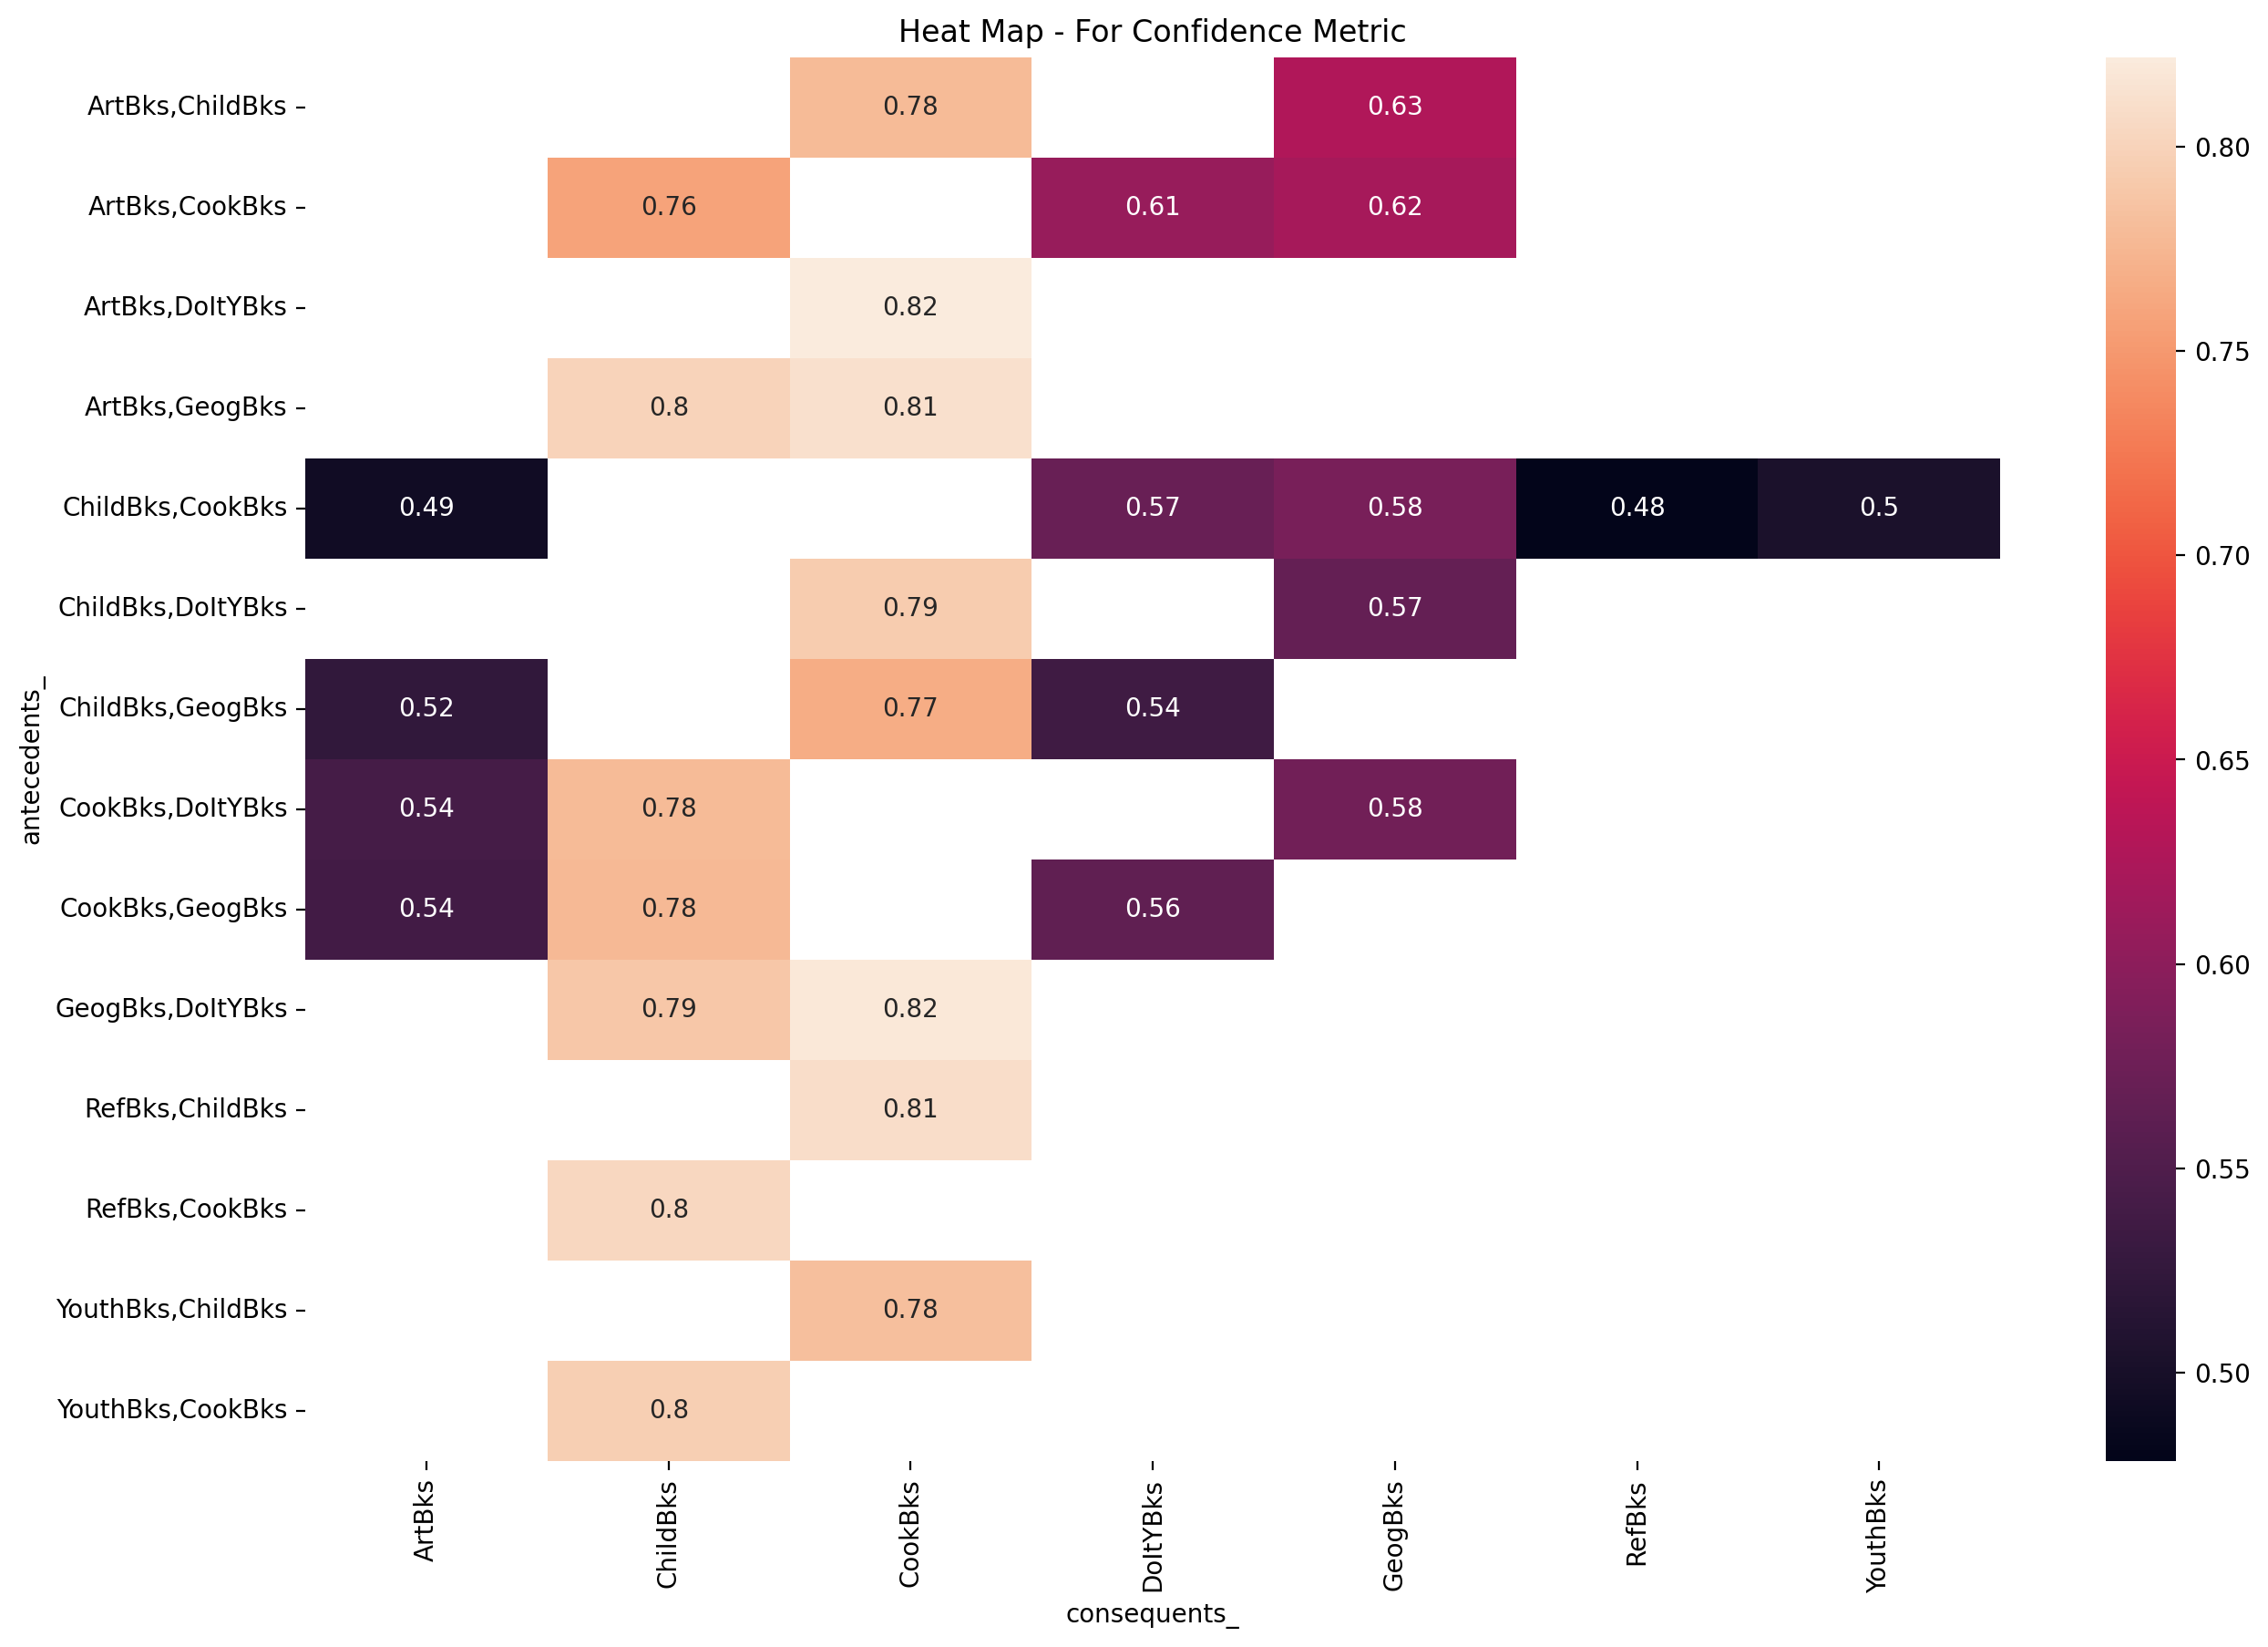

In [13]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
# Threshold = 0.6
model = association_rules(df= frequent_items ,metric = 'confidence', min_threshold=0.6)
model

antecedents consequents  antecedent support  consequent support  \
0             (YouthBks)  (ChildBks)              0.2475               0.423   
1             (ChildBks)   (CookBks)              0.4230               0.431   
2             (DoItYBks)  (ChildBks)              0.2820               0.423   
3               (RefBks)  (ChildBks)              0.2145               0.423   
4               (ArtBks)  (ChildBks)              0.2410               0.423   
5              (GeogBks)  (ChildBks)              0.2760               0.423   
6             (YouthBks)   (CookBks)              0.2475               0.431   
7             (DoItYBks)   (CookBks)              0.2820               0.431   
8               (RefBks)   (CookBks)              0.2145               0.431   
9               (ArtBks)   (CookBks)              0.2410               0.431   
10             (GeogBks)   (CookBks)              0.2760               0.431   
11            (ItalCook)   (CookBks)              0.1135               0.431   
12   (YouthBks, CookBks)  (ChildBks)              0.1620               0.423   
13  (YouthBks, ChildBks)   (CookBks)              0.1650               0.431   
14   (CookBks, DoItYBks)  (ChildBks)              0.1875               0.423   
15  (ChildBks, DoItYBks)   (CookBks)              0.1840               0.431   
16     (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
17    (RefBks, ChildBks)   (CookBks)              0.1515               0.431   
18     (ArtBks, CookBks)  (ChildBks)              0.1670               0.423   
19    (ArtBks, ChildBks)   (CookBks)              0.1625               0.431   
20    (CookBks, GeogBks)  (ChildBks)              0.1925               0.423   
21   (ChildBks, GeogBks)   (CookBks)              0.1950               0.431   
22   (GeogBks, DoItYBks)  (ChildBks)              0.1325               0.423   
23     (ArtBks, GeogBks)  (ChildBks)              0.1275               0.423   
24    (ArtBks, ChildBks)   (GeogBks)              0.1625               0.276   
25    (ArtBks, DoItYBks)   (CookBks)              0.1235               0.431   
26     (ArtBks, CookBks)  (DoItYBks)              0.1670               0.282   
27   (GeogBks, DoItYBks)   (CookBks)              0.1325               0.431   
28     (ArtBks, GeogBks)   (CookBks)              0.1275               0.431   
29     (ArtBks, CookBks)   (GeogBks)              0.1670               0.276   

    support  confidence      lift  leverage  conviction  
0    0.1650    0.666667  1.576044  0.060308    1.731000  
1    0.2560    0.605201  1.404179  0.073687    1.441240  
2    0.1840    0.652482  1.542511  0.064714    1.660347  
3    0.1515    0.706294  1.669725  0.060767    1.964548  
4    0.1625    0.674274  1.594028  0.060557    1.771427  
5    0.1950    0.706522  1.670264  0.078252    1.966074  
6    0.1620    0.654545  1.518667  0.055328    1.647105  
7    0.1875    0.664894  1.542677  0.065958    1.697968  
8    0.1525    0.710956  1.649549  0.060050    1.968556  
9    0.1670    0.692946  1.607763  0.063129    1.853095  
10   0.1925    0.697464  1.618245  0.073544    1.880766  
11   0.1135    1.000000  2.320186  0.064582         inf  
12   0.1290    0.796296  1.882497  0.060474    2.832545  
13   0.1290    0.781818  1.813963  0.057885    2.607917  
14   0.1460    0.778667  1.840820  0.066687    2.606928  
15   0.1460    0.793478  1.841017  0.066696    2.755158  
16   0.1225    0.803279  1.899004  0.057993    2.933083  
17   0.1225    0.808581  1.876058  0.057204    2.972534  
18   0.1265    0.757485  1.790745  0.055859    2.379235  
19   0.1265    0.778462  1.806175  0.056462    2.568403  
20   0.1495    0.776623  1.835989  0.068072    2.583081  
21   0.1495    0.766667  1.778809  0.065455    2.438571  
22   0.1045    0.788679  1.864490  0.048452    2.730446  
23   0.1020    0.800000  1.891253  0.048067    2.885000  
24   0.1020    0.627692  2.274247  0.057150    1.944628  
25   0.1015    0.821862 

In [15]:
model[(model.support > 0.015) & (model.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(30, 9)

In [16]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  \
24   (ArtBks, ChildBks)   (GeogBks)              0.1625               0.276   
29    (ArtBks, CookBks)   (GeogBks)              0.1670               0.276   
26    (ArtBks, CookBks)  (DoItYBks)              0.1670               0.282   
25   (ArtBks, DoItYBks)   (CookBks)              0.1235               0.431   
27  (GeogBks, DoItYBks)   (CookBks)              0.1325               0.431   

    support  confidence      lift  leverage  conviction  lhs items  
24   0.1020    0.627692  2.274247  0.057150    1.944628          2  
29   0.1035    0.619760  2.245509  0.057408    1.904063          2  
26   0.1015    0.607784  2.155264  0.054406    1.830626          2  
25   0.1015    0.821862  1.906873  0.048272    3.194159          2  
27   0.1085    0.818868  1.899926  0.051392    3.141354          2

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'ChildBks'),
  Text(1.5, 0, 'CookBks'),
  Text(2.5, 0, 'DoItYBks'),
  Text(3.5, 0, 'GeogBks')])

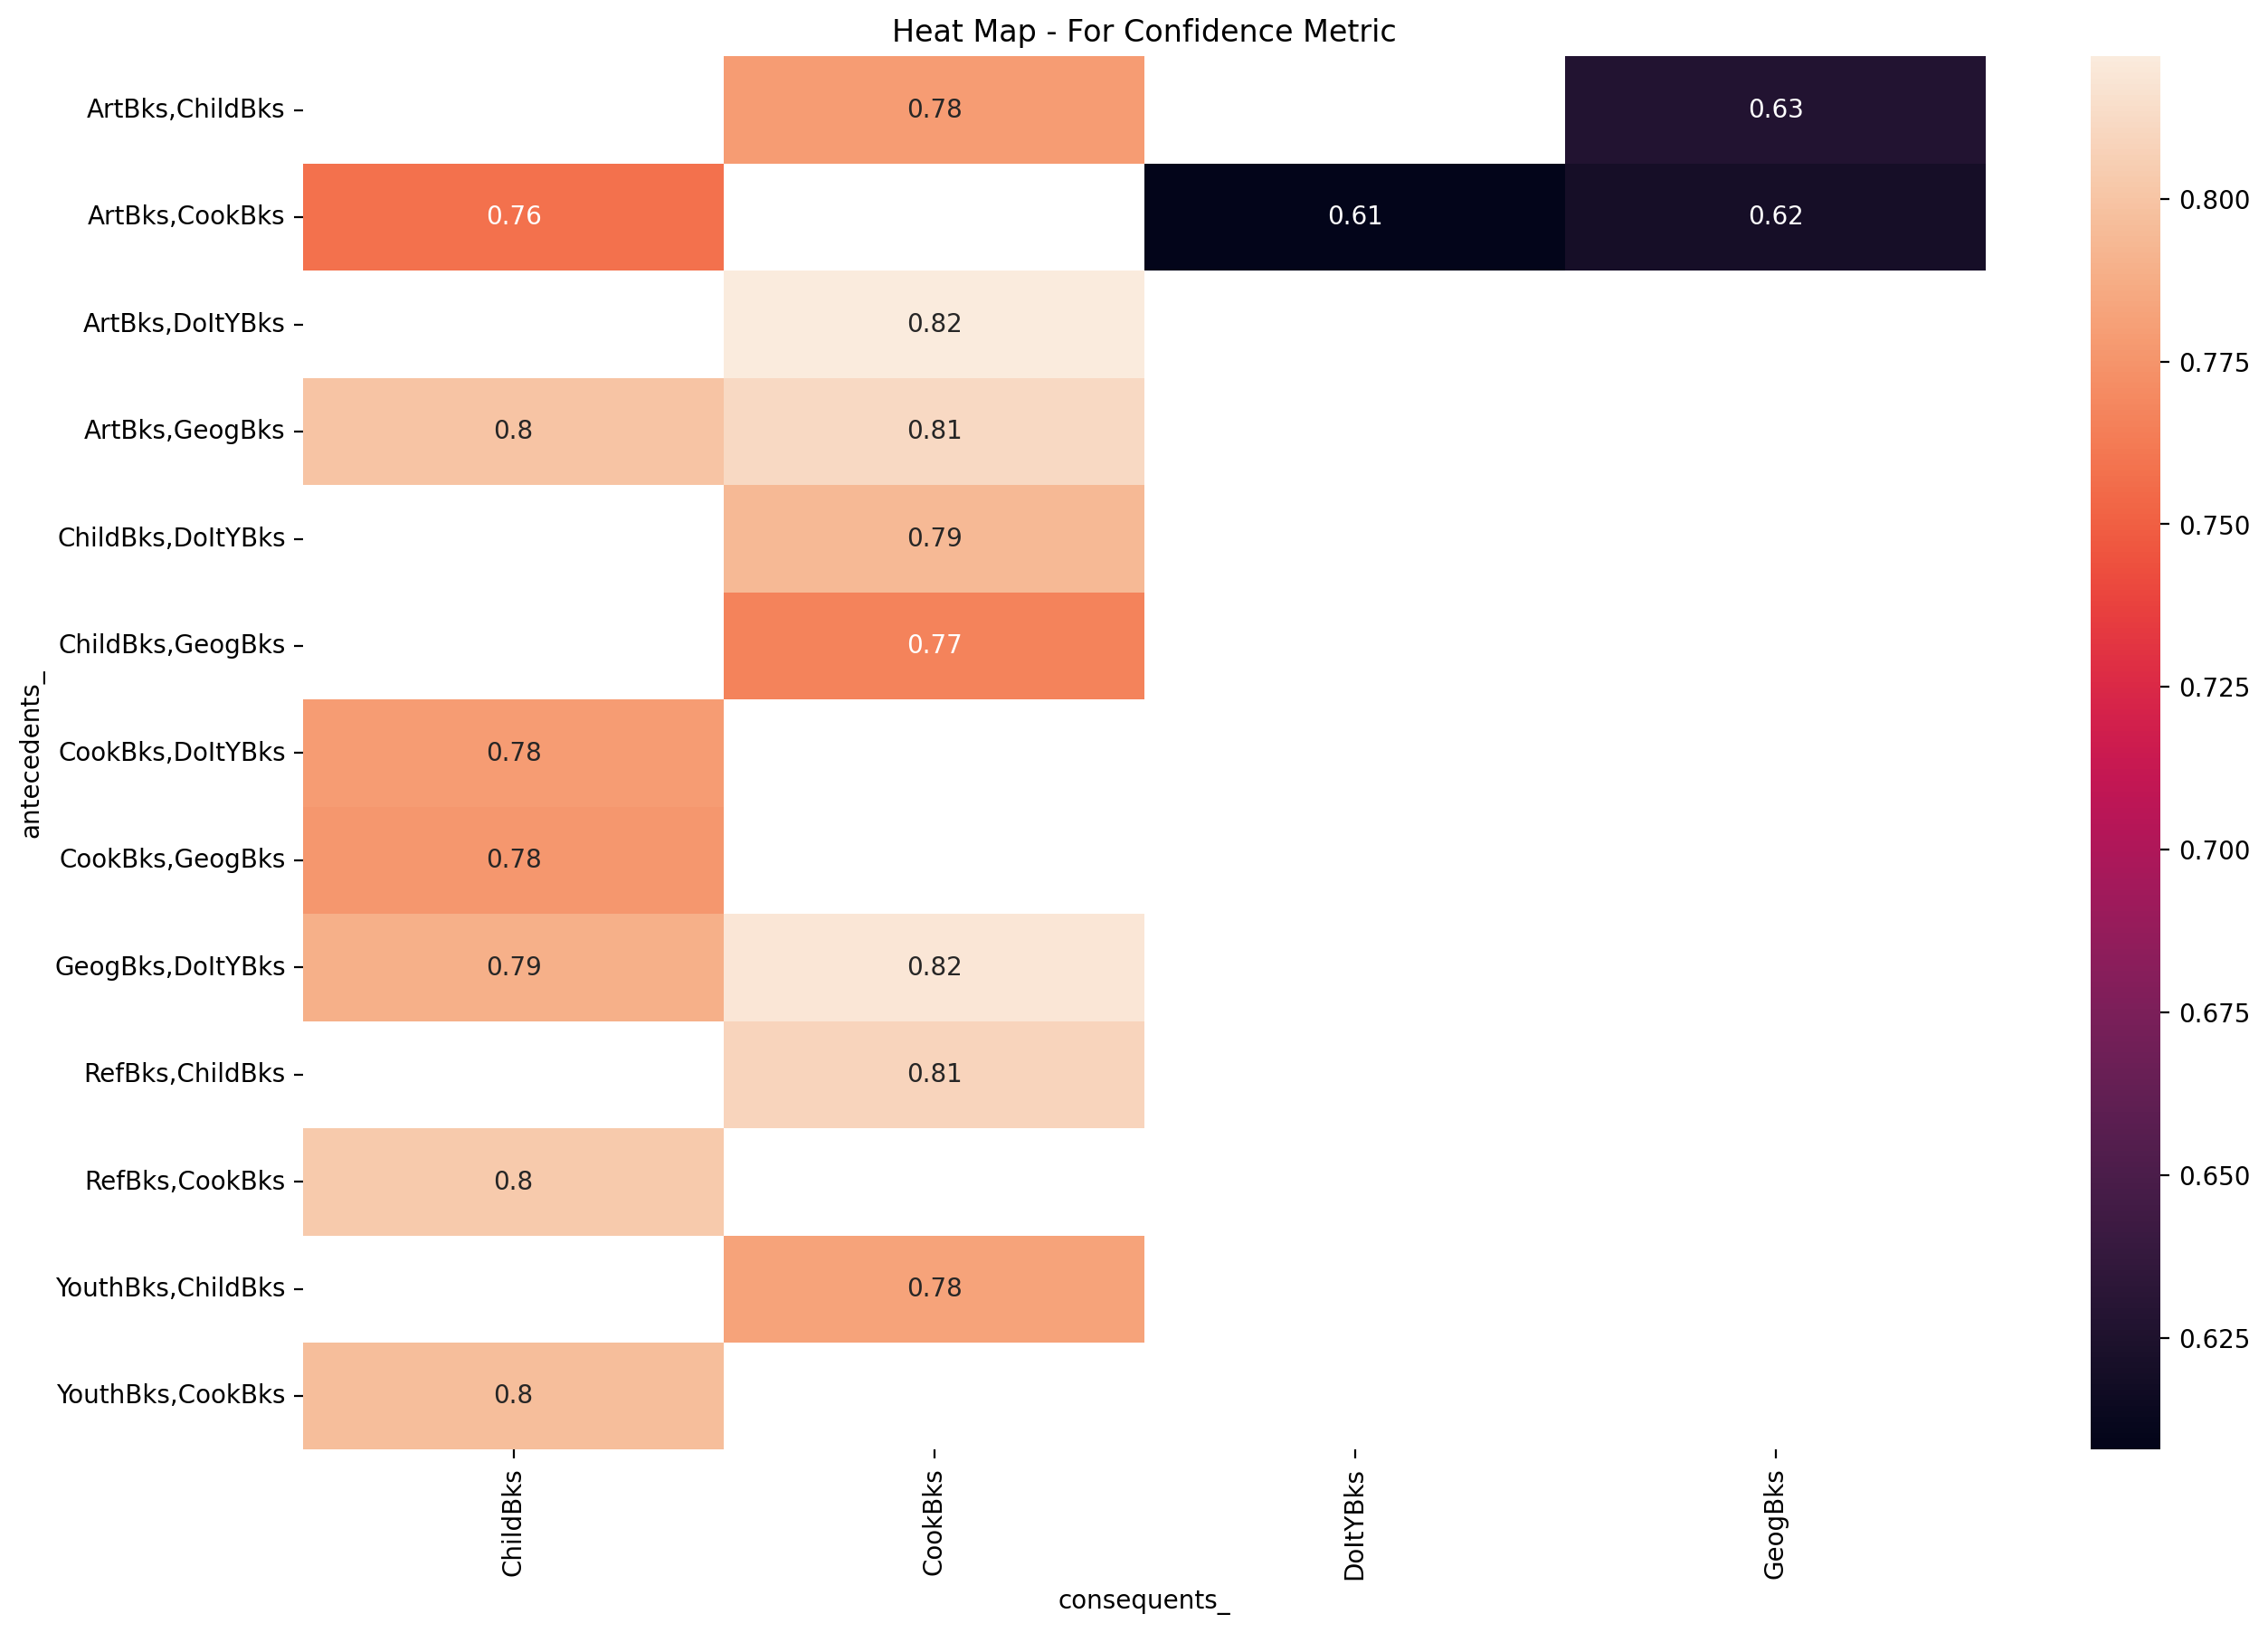

In [17]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Set support value of 0.2**

In [18]:
frequent_items = apriori(df,min_support=0.2, use_colnames=True,verbose=1)
frequent_items

Processing 42 combinations | Sampling itemset size 2


support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (CookBks, ChildBks)

In [19]:
len(frequent_items)

8

## Model Building With different Threshold values

In [20]:
# Threshold = 0.2
model = association_rules(df= frequent_items ,metric = 'confidence', min_threshold= 0.2)
model

antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  
0    0.593968  1.404179  0.073687    1.421069  
1    0.605201  1.404179  0.073687    1.441240

In [21]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>=1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  lhs items  
0    0.593968  1.404179  0.073687    1.421069          1  
1    0.605201  1.404179  0.073687    1.441240          1

(array([0.5, 1.5]), [Text(0.5, 0, 'ChildBks'), Text(1.5, 0, 'CookBks')])

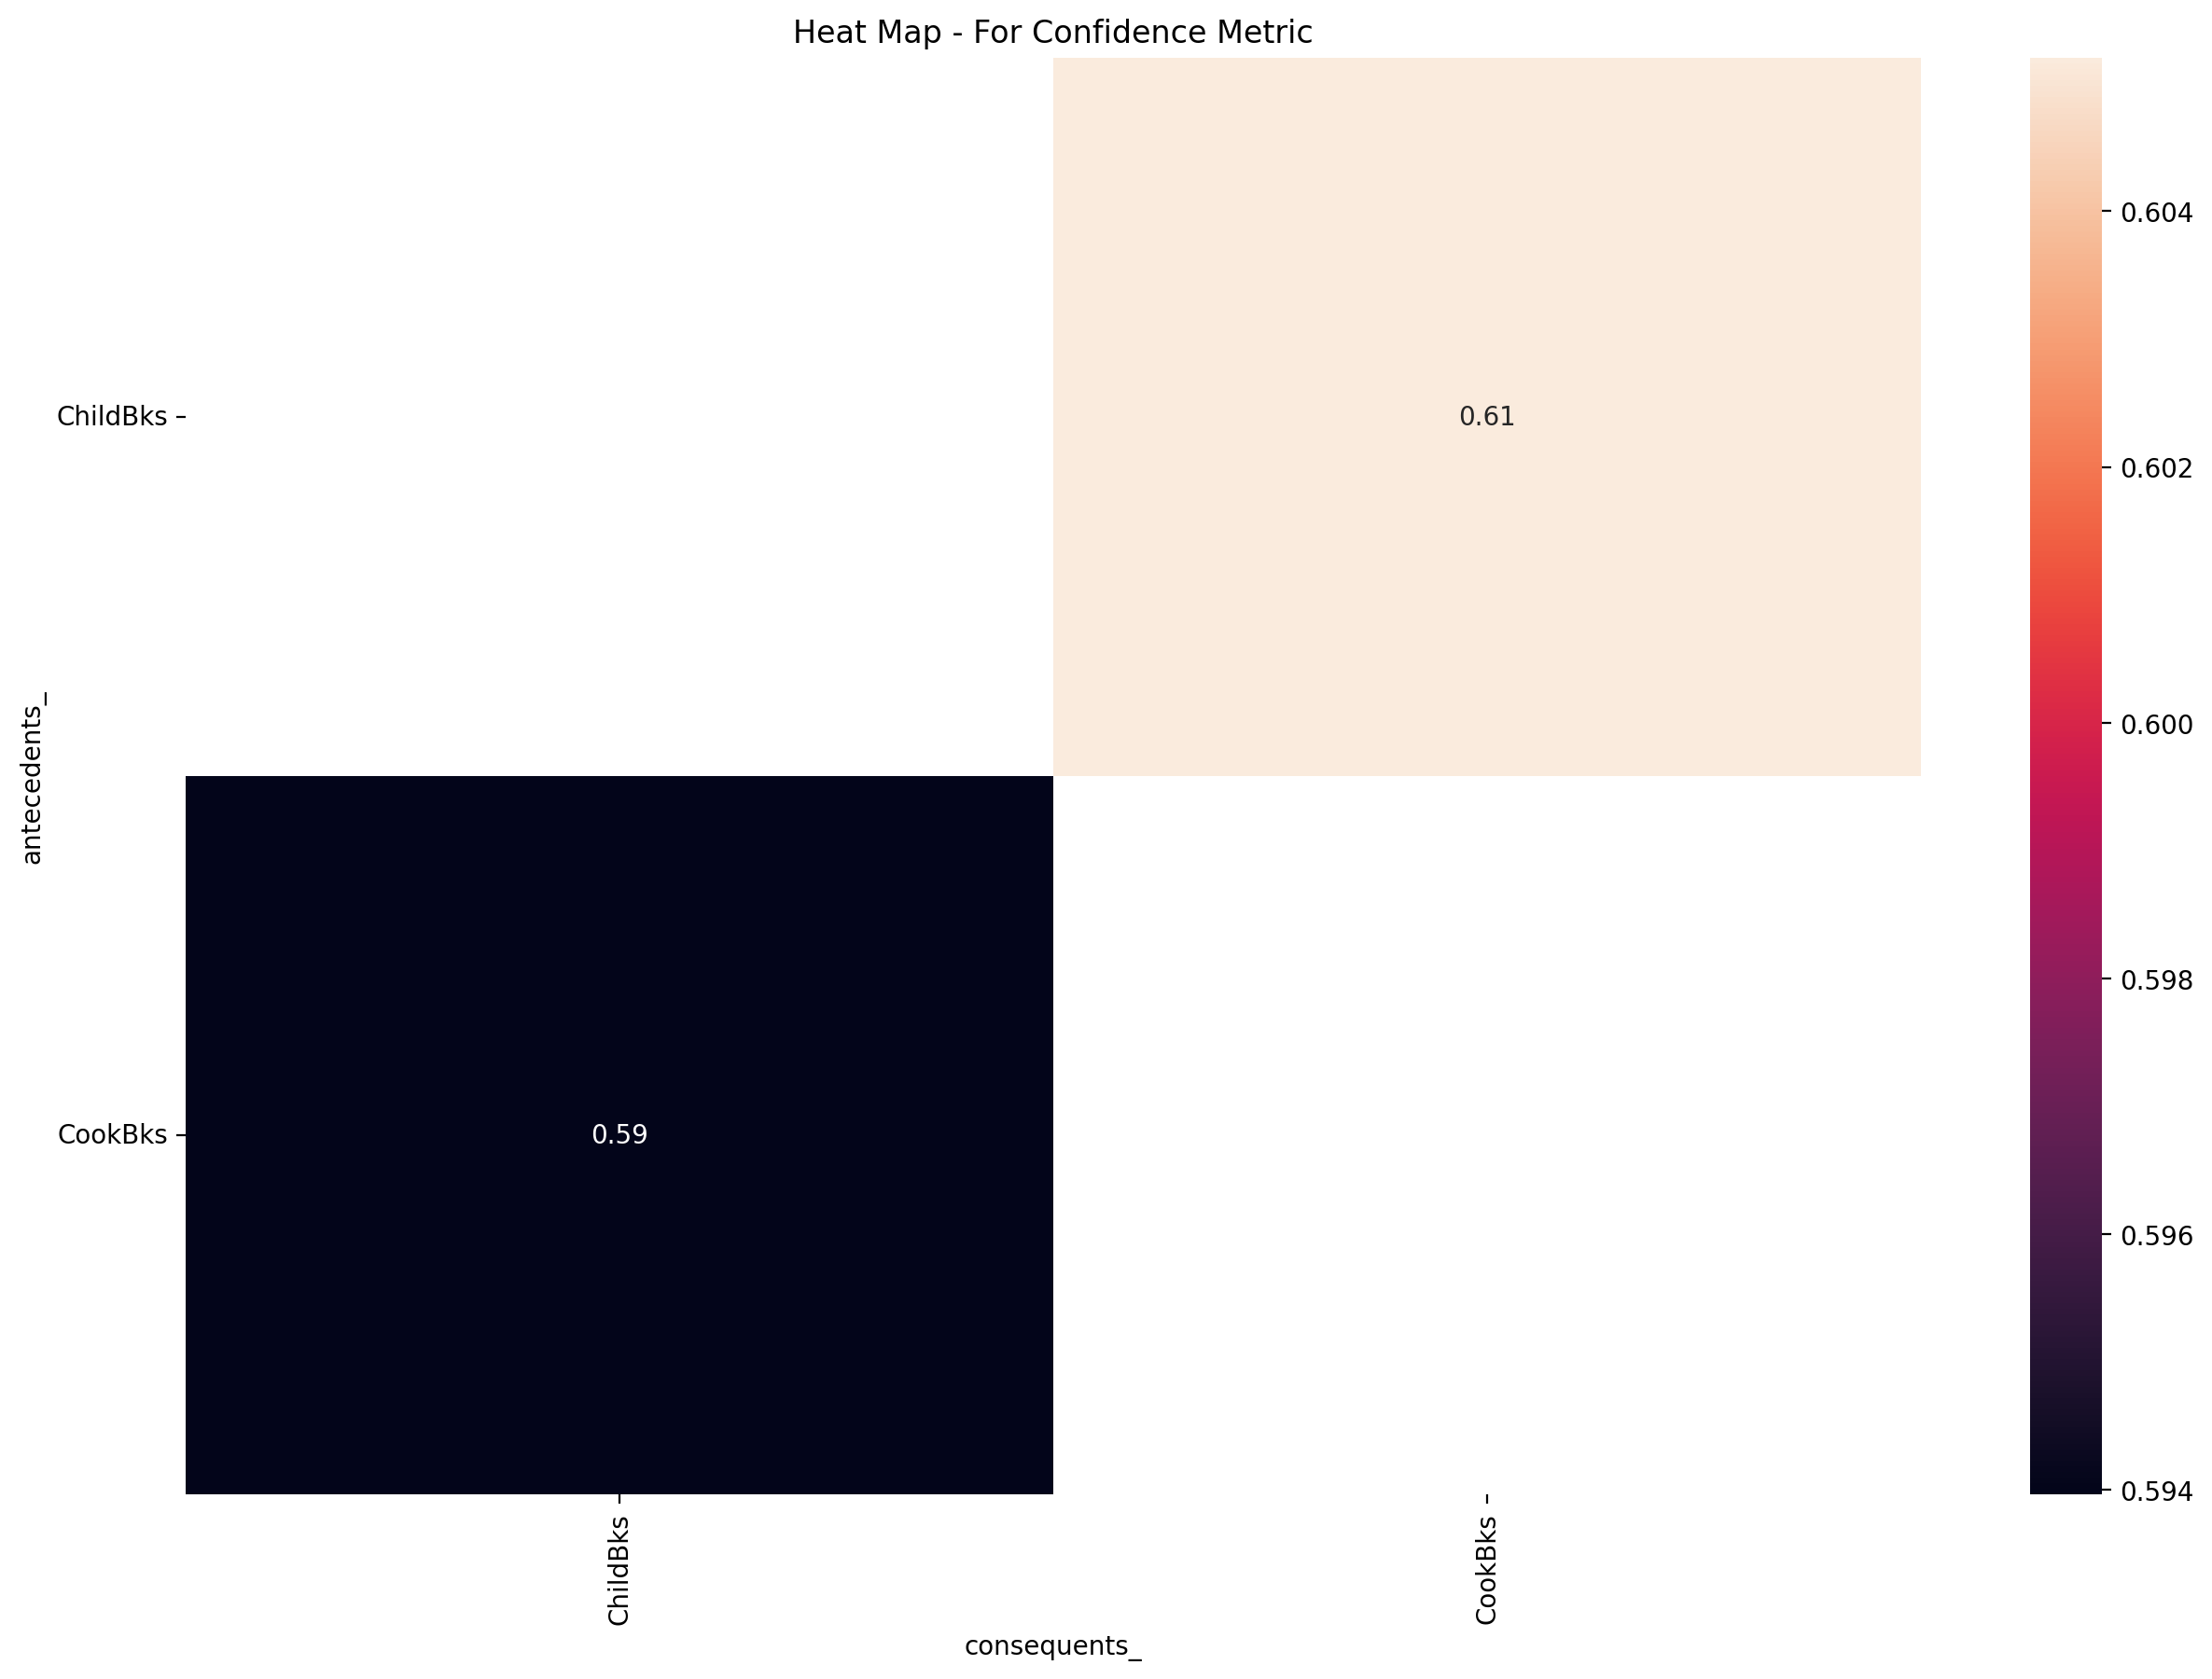

In [22]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>=1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [23]:
# Threshold = 0.6
model = association_rules(df= frequent_items ,metric = 'confidence', min_threshold= 0.6)
model

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687     1.44124

In [24]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>=1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  lhs items  
0    0.605201  1.404179  0.073687     1.44124          1

(array([0.5]), [Text(0.5, 0, 'CookBks')])

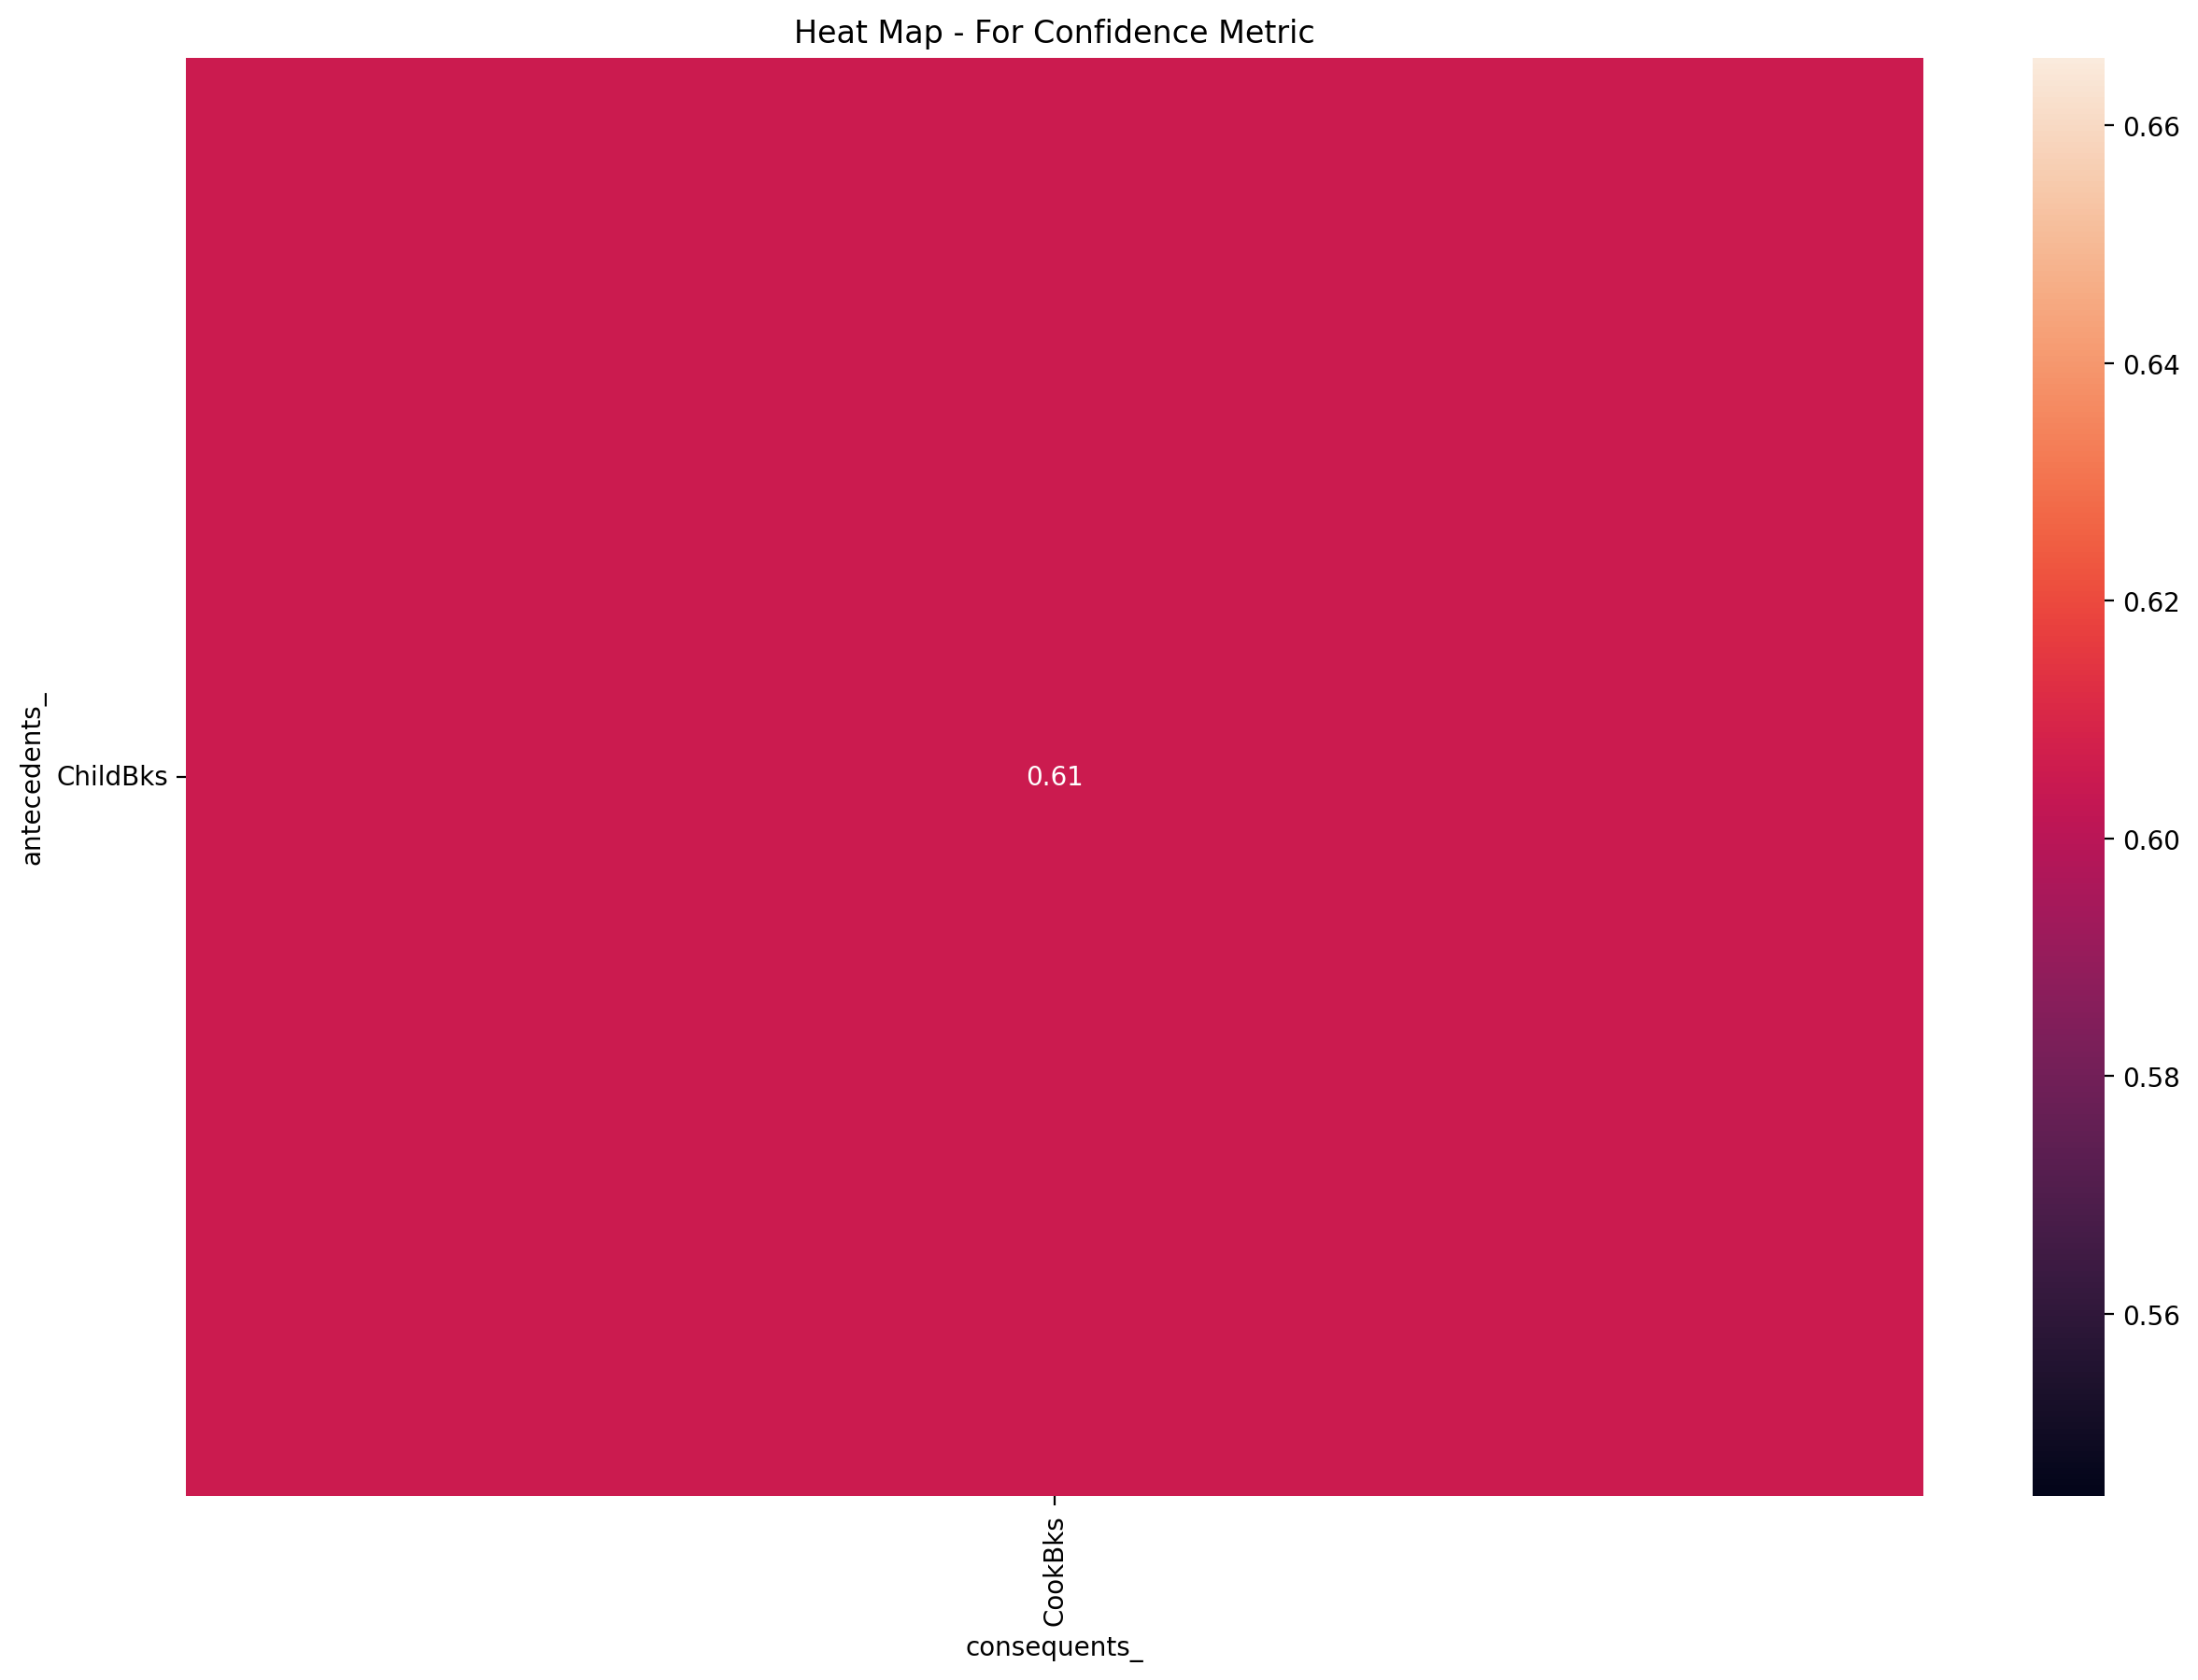

In [25]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>=1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

### FpGrowth Algorithm

**Set Minimum Support = 0.1**

In [26]:
# Minimun support = 0.1

frequent_itemsets_fp = fpgrowth(df,
                                min_support=0.1,
                                use_colnames=True,
                                verbose=1)


9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

In [27]:
# Threshold = 0.2

model = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.2)
model

antecedents          consequents  antecedent support  \
0            (DoItYBks)           (ChildBks)              0.2820   
1            (ChildBks)           (DoItYBks)              0.4230   
2            (DoItYBks)            (CookBks)              0.2820   
3             (CookBks)           (DoItYBks)              0.4310   
4   (CookBks, DoItYBks)           (ChildBks)              0.1875   
..                  ...                  ...                 ...   
95            (GeogBks)   (ArtBks, ChildBks)              0.2760   
96             (ArtBks)  (ChildBks, GeogBks)              0.2410   
97           (ChildBks)    (ArtBks, GeogBks)              0.4230   
98           (ItalCook)            (CookBks)              0.1135   
99            (CookBks)           (ItalCook)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
1               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770  
2               0.4310   0.1875    0.664894  1.542677  0.065958    1.697968  
3               0.2820   0.1875    0.435035  1.542677  0.065958    1.270875  
4               0.4230   0.1460    0.778667  1.840820  0.066687    2.606928  
..                 ...      ...         ...       ...       ...         ...  
95              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
96              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
97              0.1275   0.1020    0.241135  1.891253  0.048067    1.149743  
98              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
99              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  

[100 rows x 9 columns]

In [28]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>=1].sort_values('lift', ascending=False).head()

antecedents          consequents  antecedent support  \
99           (CookBks)           (ItalCook)              0.4310   
98          (ItalCook)            (CookBks)              0.1135   
94  (ArtBks, ChildBks)            (GeogBks)              0.1625   
95           (GeogBks)   (ArtBks, ChildBks)              0.2760   
84            (ArtBks)  (CookBks, DoItYBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  \
99              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406   
98              0.4310   0.1135    1.000000  2.320186  0.064582         inf   
94              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628   
95              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448   
84              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674   

    lhs items  
99          1  
98          1  
94          2  
95          1  
84          1

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ArtBks,ChildBks'),
  Text(2.5, 0, 'ArtBks,CookBks'),
  Text(3.5, 0, 'ArtBks,DoItYBks'),
  Text(4.5, 0, 'ArtBks,GeogBks'),
  Text(5.5, 0, 'ChildBks'),
  Text(6.5, 0, 'ChildBks,CookBks'),
  Text(7.5, 0, 'ChildBks,DoItYBks'),
  Text(8.5, 0, 'ChildBks,GeogBks'),
  Text(9.5, 0, 'CookBks'),
  Text(10.5, 0, 'CookBks,DoItYBks'),
  Text(11.5, 0, 'CookBks,GeogBks'),
  Text(12.5, 0, 'DoItYBks'),
  Text(13.5, 0, 'GeogBks'),
  Text(14.5, 0, 'GeogBks,DoItYBks'),
  Text(15.5, 0, 'ItalCook'),
  Text(16.5, 0, 'RefBks'),
  Text(17.5, 0, 'RefBks,ChildBks'),
  Text(18.5, 0, 'RefBks,CookBks'),
  Text(19.5, 0, 'YouthBks'),
  Text(20.5, 0, 'YouthBks,ChildBks'),
  Text(21.5, 0, 'YouthBks,CookBks')])

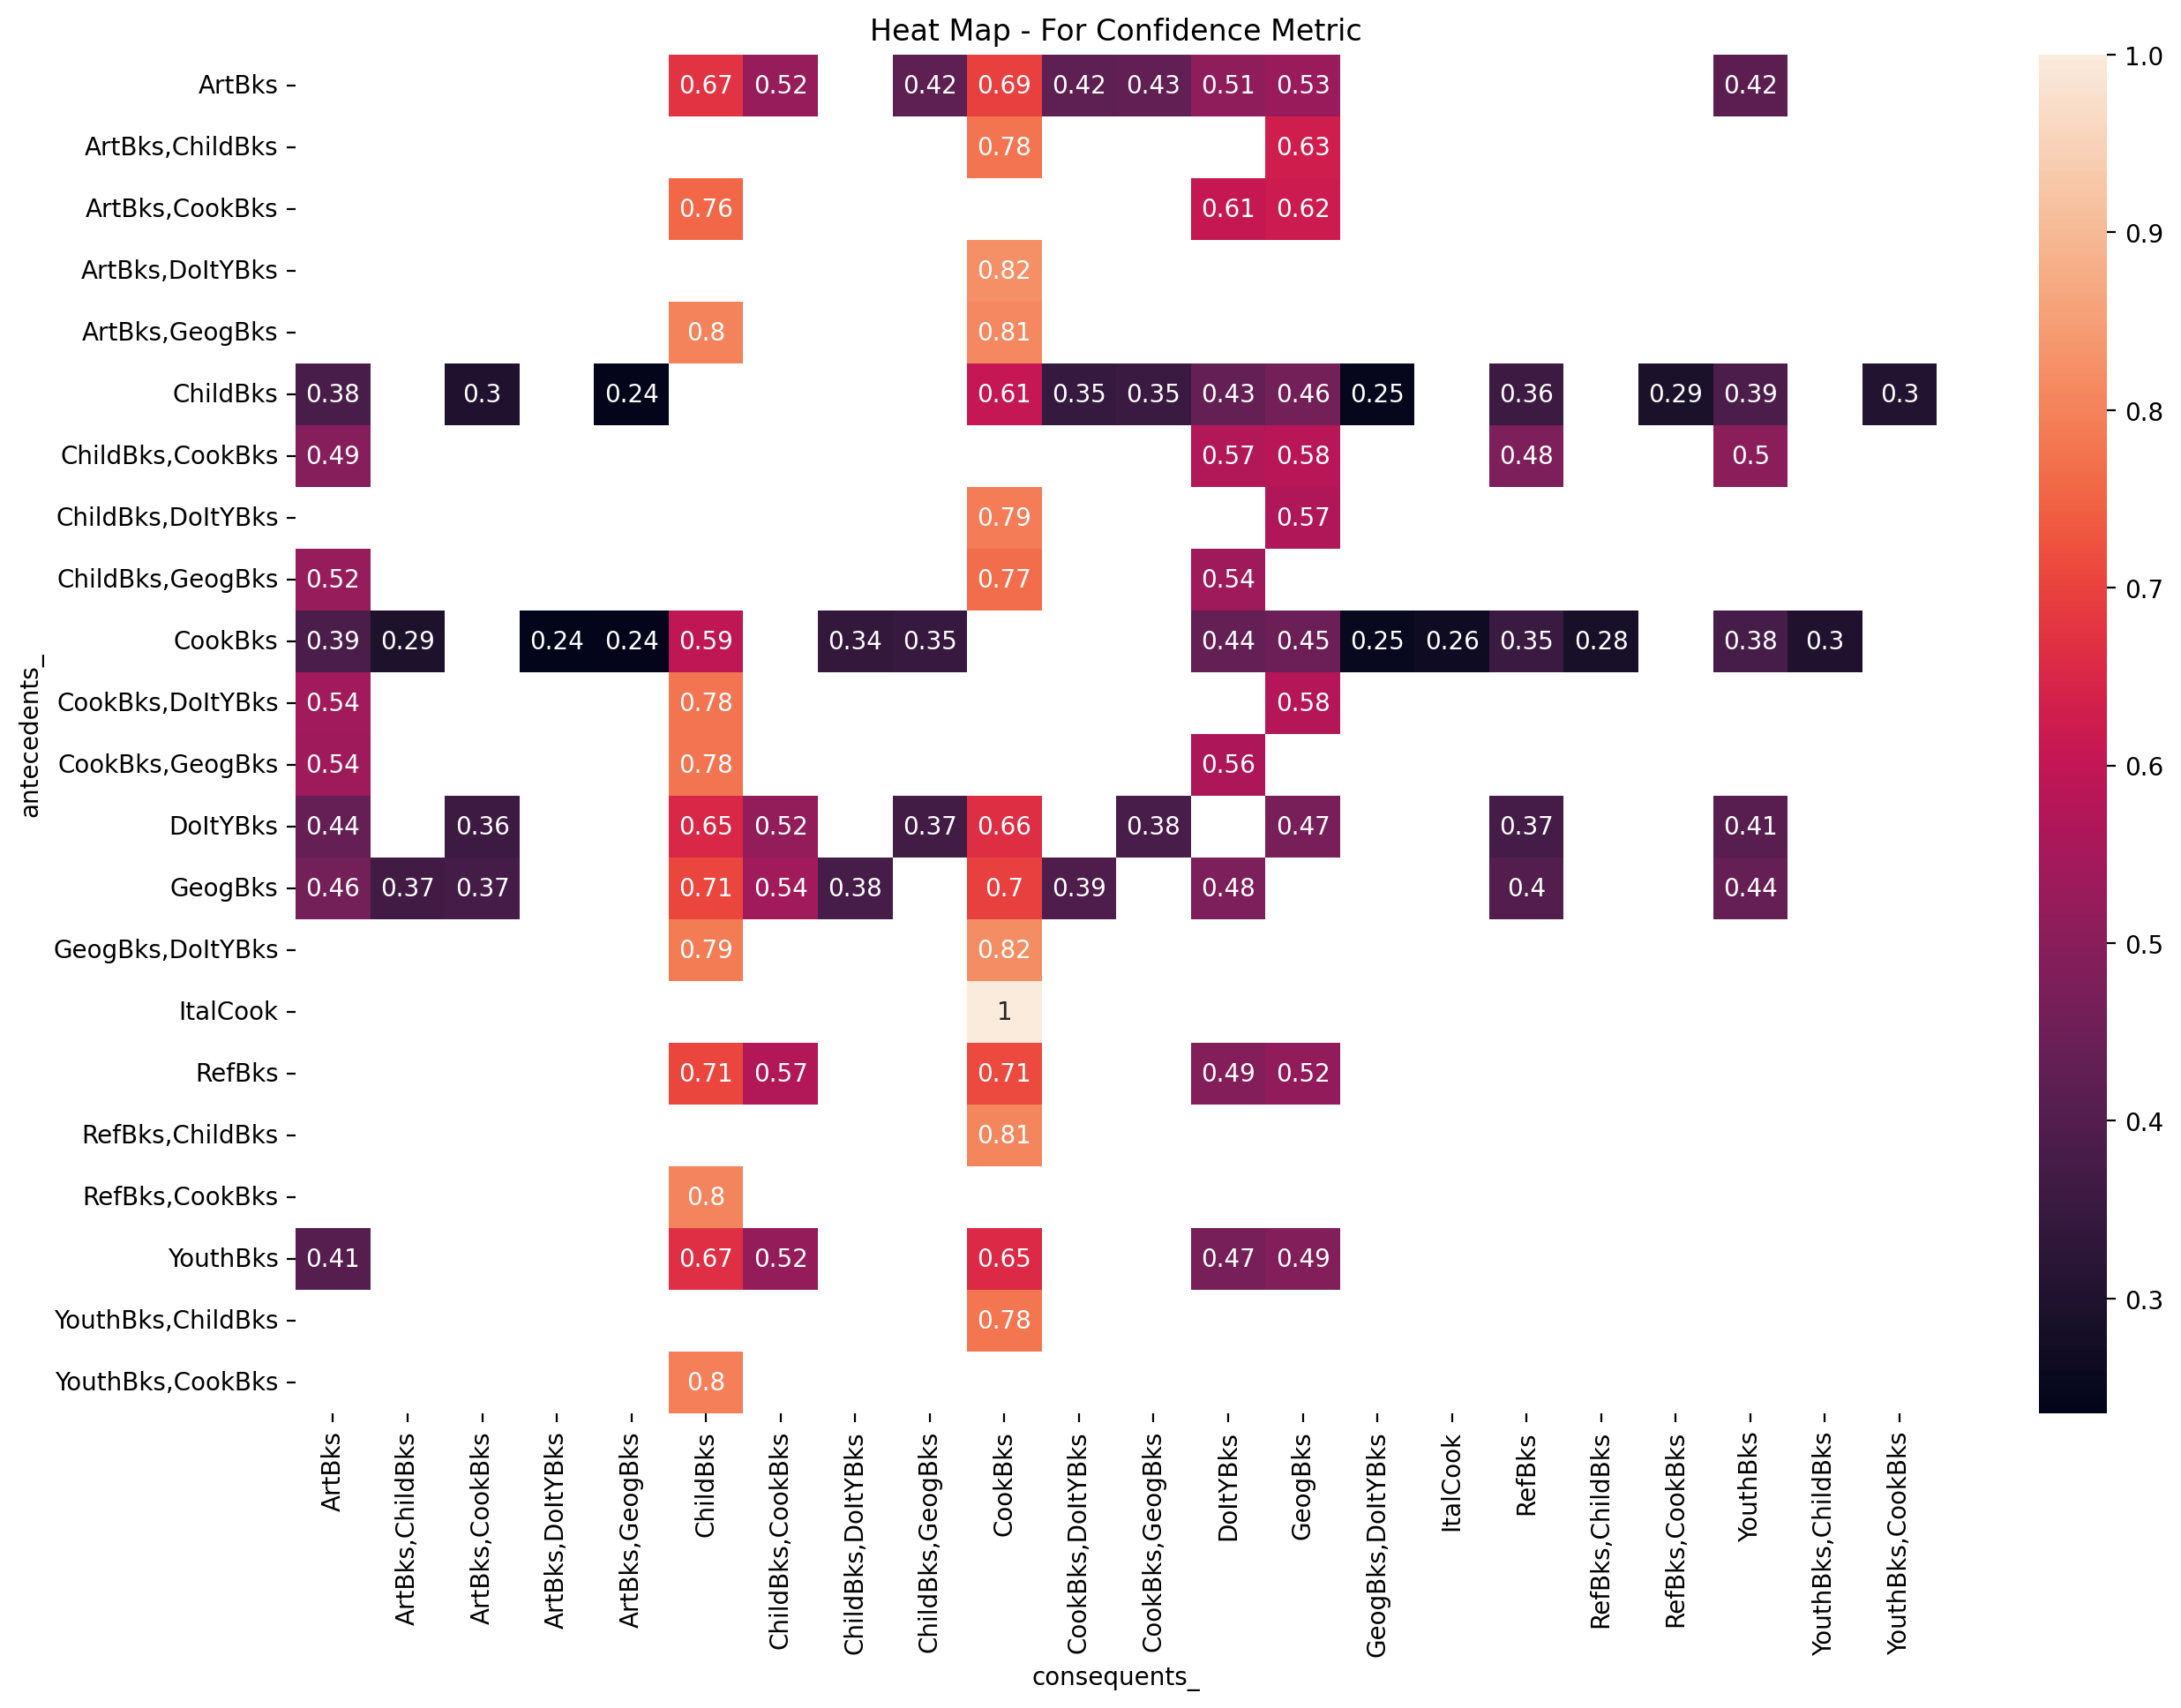

In [29]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>=1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [30]:
# Threshold = 0.6
model = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.6)
model

antecedents          consequents  antecedent support  \
0            (DoItYBks)           (ChildBks)              0.2820   
1            (ChildBks)           (DoItYBks)              0.4230   
2            (DoItYBks)            (CookBks)              0.2820   
3             (CookBks)           (DoItYBks)              0.4310   
4   (CookBks, DoItYBks)           (ChildBks)              0.1875   
..                  ...                  ...                 ...   
95            (GeogBks)   (ArtBks, ChildBks)              0.2760   
96             (ArtBks)  (ChildBks, GeogBks)              0.2410   
97           (ChildBks)    (ArtBks, GeogBks)              0.4230   
98           (ItalCook)            (CookBks)              0.1135   
99            (CookBks)           (ItalCook)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
1               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770  
2               0.4310   0.1875    0.664894  1.542677  0.065958    1.697968  
3               0.2820   0.1875    0.435035  1.542677  0.065958    1.270875  
4               0.4230   0.1460    0.778667  1.840820  0.066687    2.606928  
..                 ...      ...         ...       ...       ...         ...  
95              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
96              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
97              0.1275   0.1020    0.241135  1.891253  0.048067    1.149743  
98              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
99              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  

[100 rows x 9 columns]

In [31]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  \
94   (ArtBks, ChildBks)   (GeogBks)              0.1625              0.2760   
81  (CookBks, DoItYBks)    (ArtBks)              0.1875              0.2410   
88    (ArtBks, CookBks)   (GeogBks)              0.1670              0.2760   
87   (CookBks, GeogBks)    (ArtBks)              0.1925              0.2410   
60  (ChildBks, CookBks)    (RefBks)              0.2560              0.2145   

    support  confidence      lift  leverage  conviction  lhs items  
94   0.1020    0.627692  2.274247  0.057150    1.944628          2  
81   0.1015    0.541333  2.246196  0.056313    1.654797          2  
88   0.1035    0.619760  2.245509  0.057408    1.904063          2  
87   0.1035    0.537662  2.230964  0.057107    1.641657          2  
60   0.1225    0.478516  2.230842  0.067588    1.506277          2

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

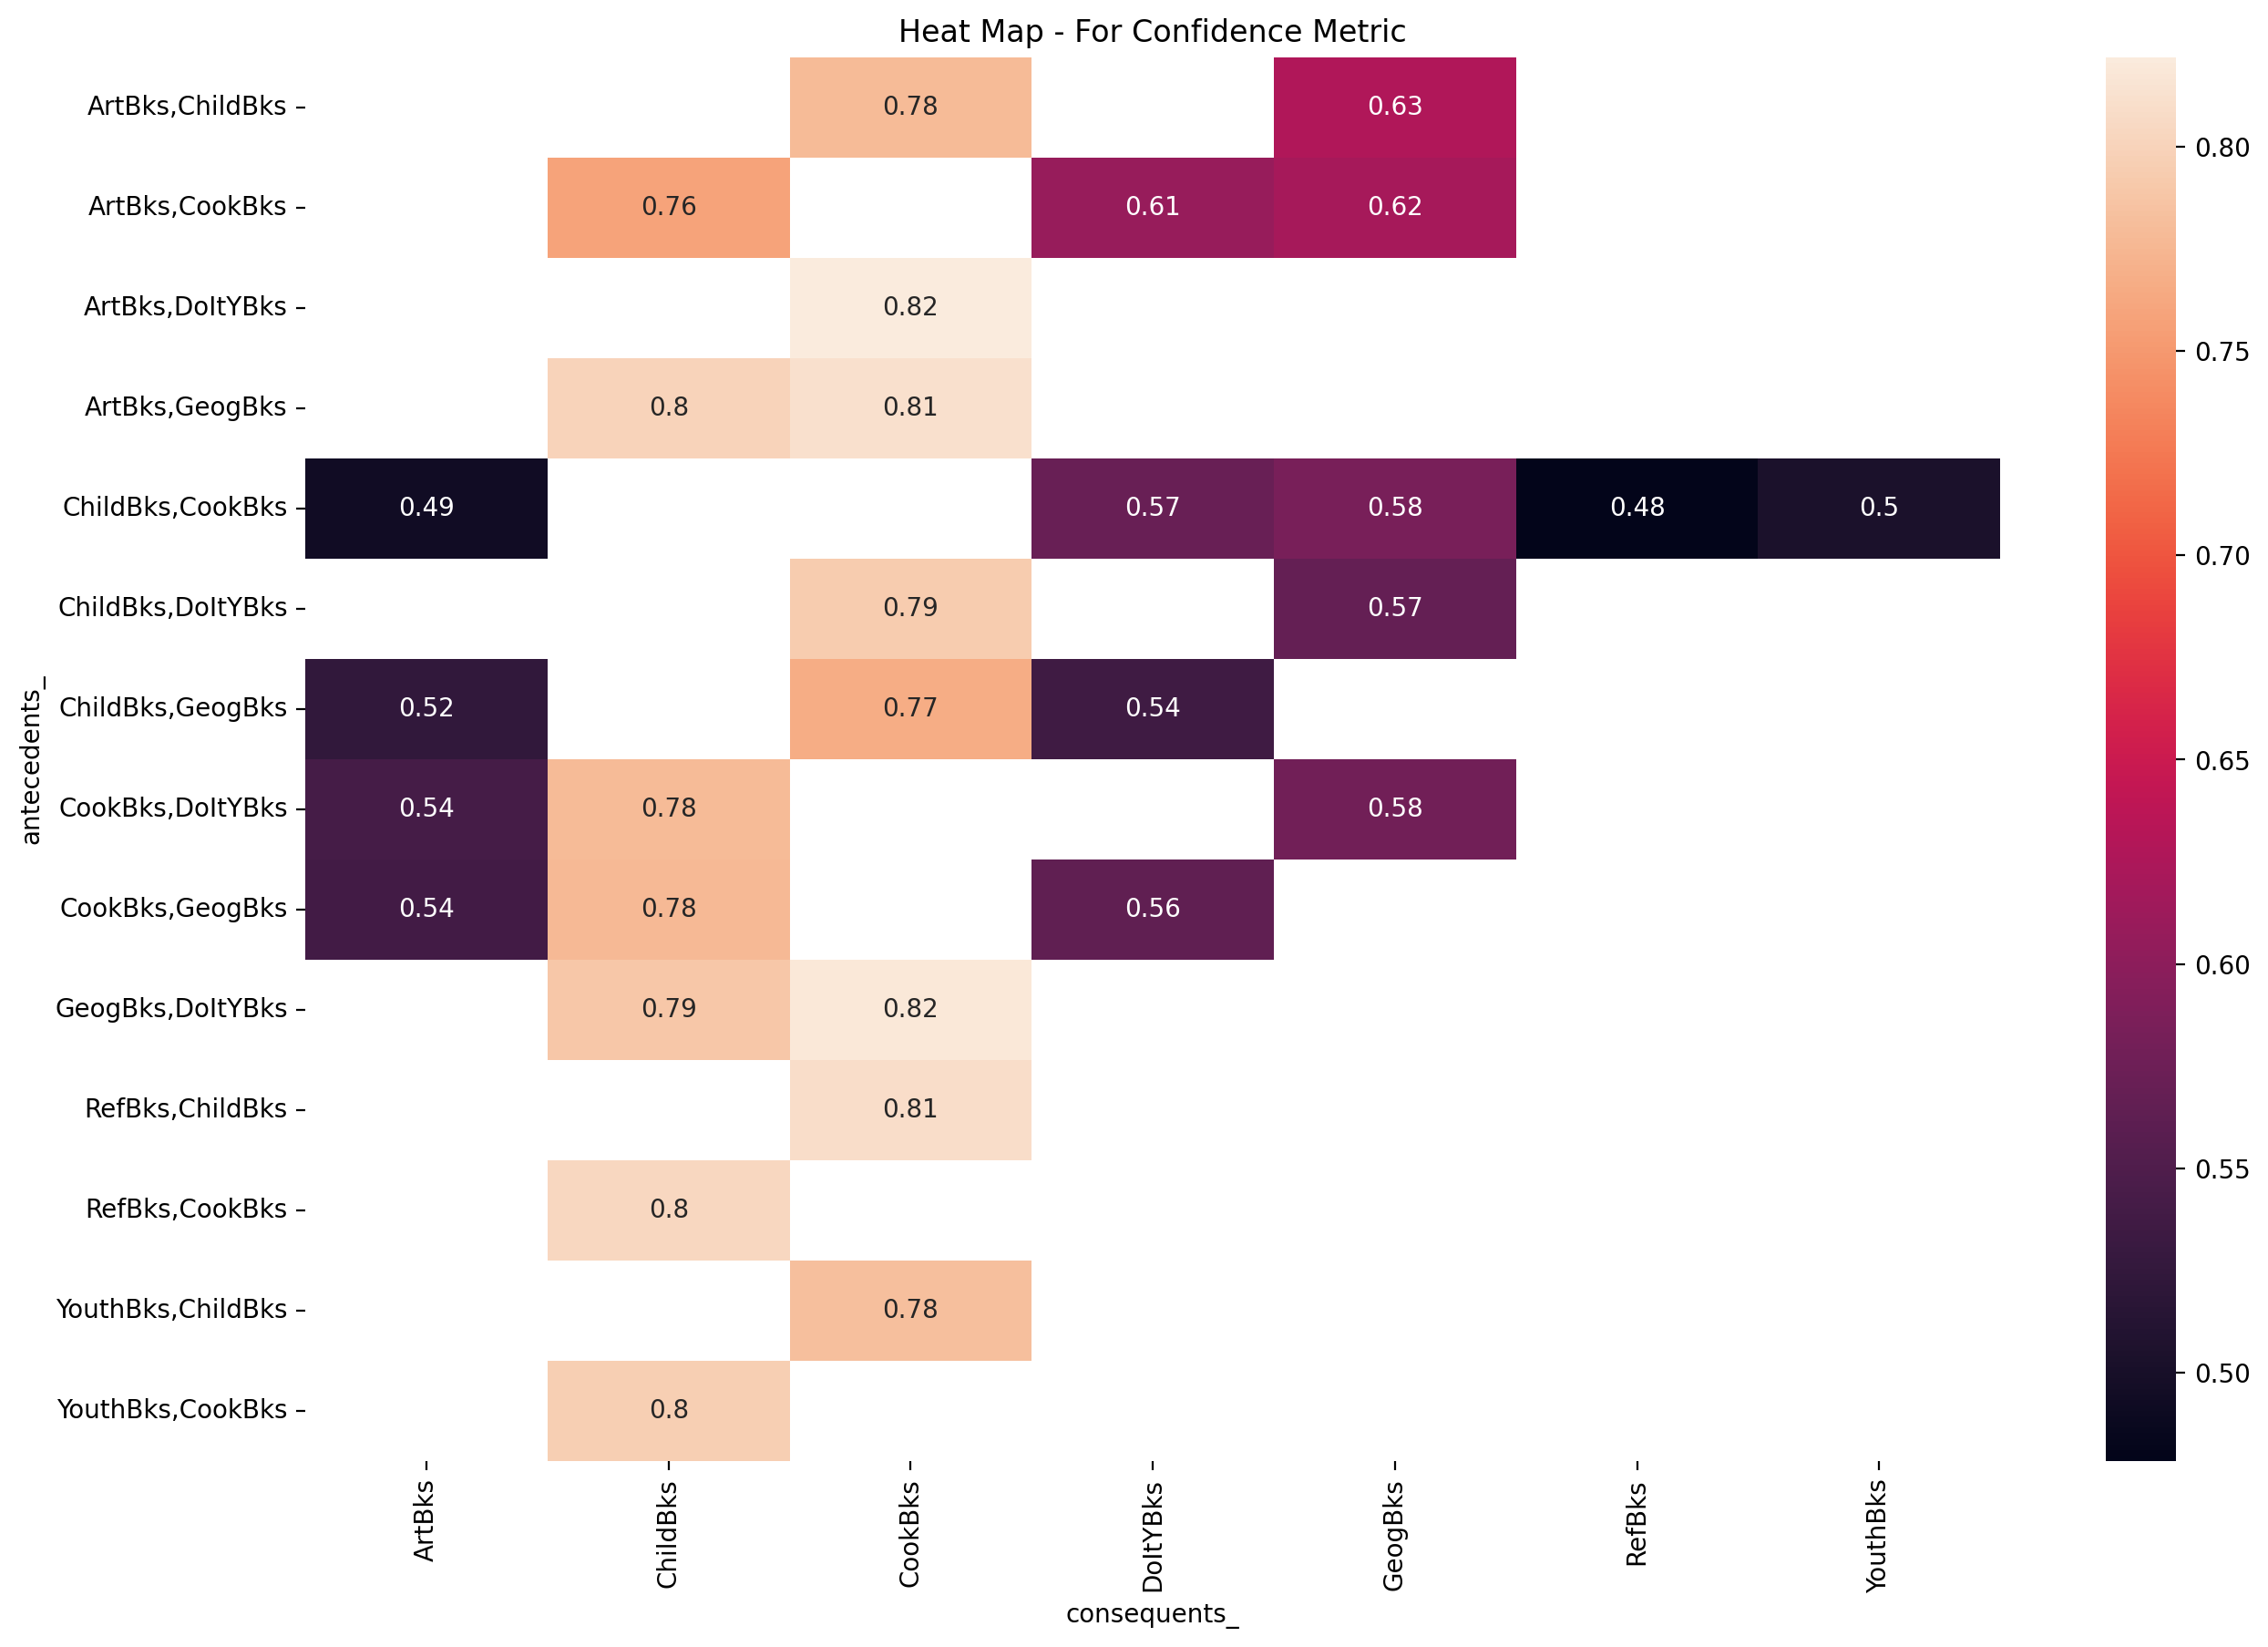

In [32]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [33]:
# Minimun support = 0.2

frequent_itemsets_fp = fpgrowth(df,
                                min_support=0.2,
                                use_colnames=True,
                                verbose=1)

7 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset(s) from tree conditioned on items (CookBks)
0 itemset(s) from tree conditioned on items (RefBks)
0 itemset(s) from tree conditioned on items (ArtBks)


In [34]:
# Threshold = 0.2

model = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.2)
model

antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  
0    0.593968  1.404179  0.073687    1.421069  
1    0.605201  1.404179  0.073687    1.441240

In [35]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>=1].sort_values('lift', ascending=False).head()

antecedents consequents  antecedent support  consequent support  support  \
0   (CookBks)  (ChildBks)               0.431               0.423    0.256   
1  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  lhs items  
0    0.593968  1.404179  0.073687    1.421069          1  
1    0.605201  1.404179  0.073687    1.441240          1

(array([0.5, 1.5]), [Text(0.5, 0, 'ChildBks'), Text(1.5, 0, 'CookBks')])

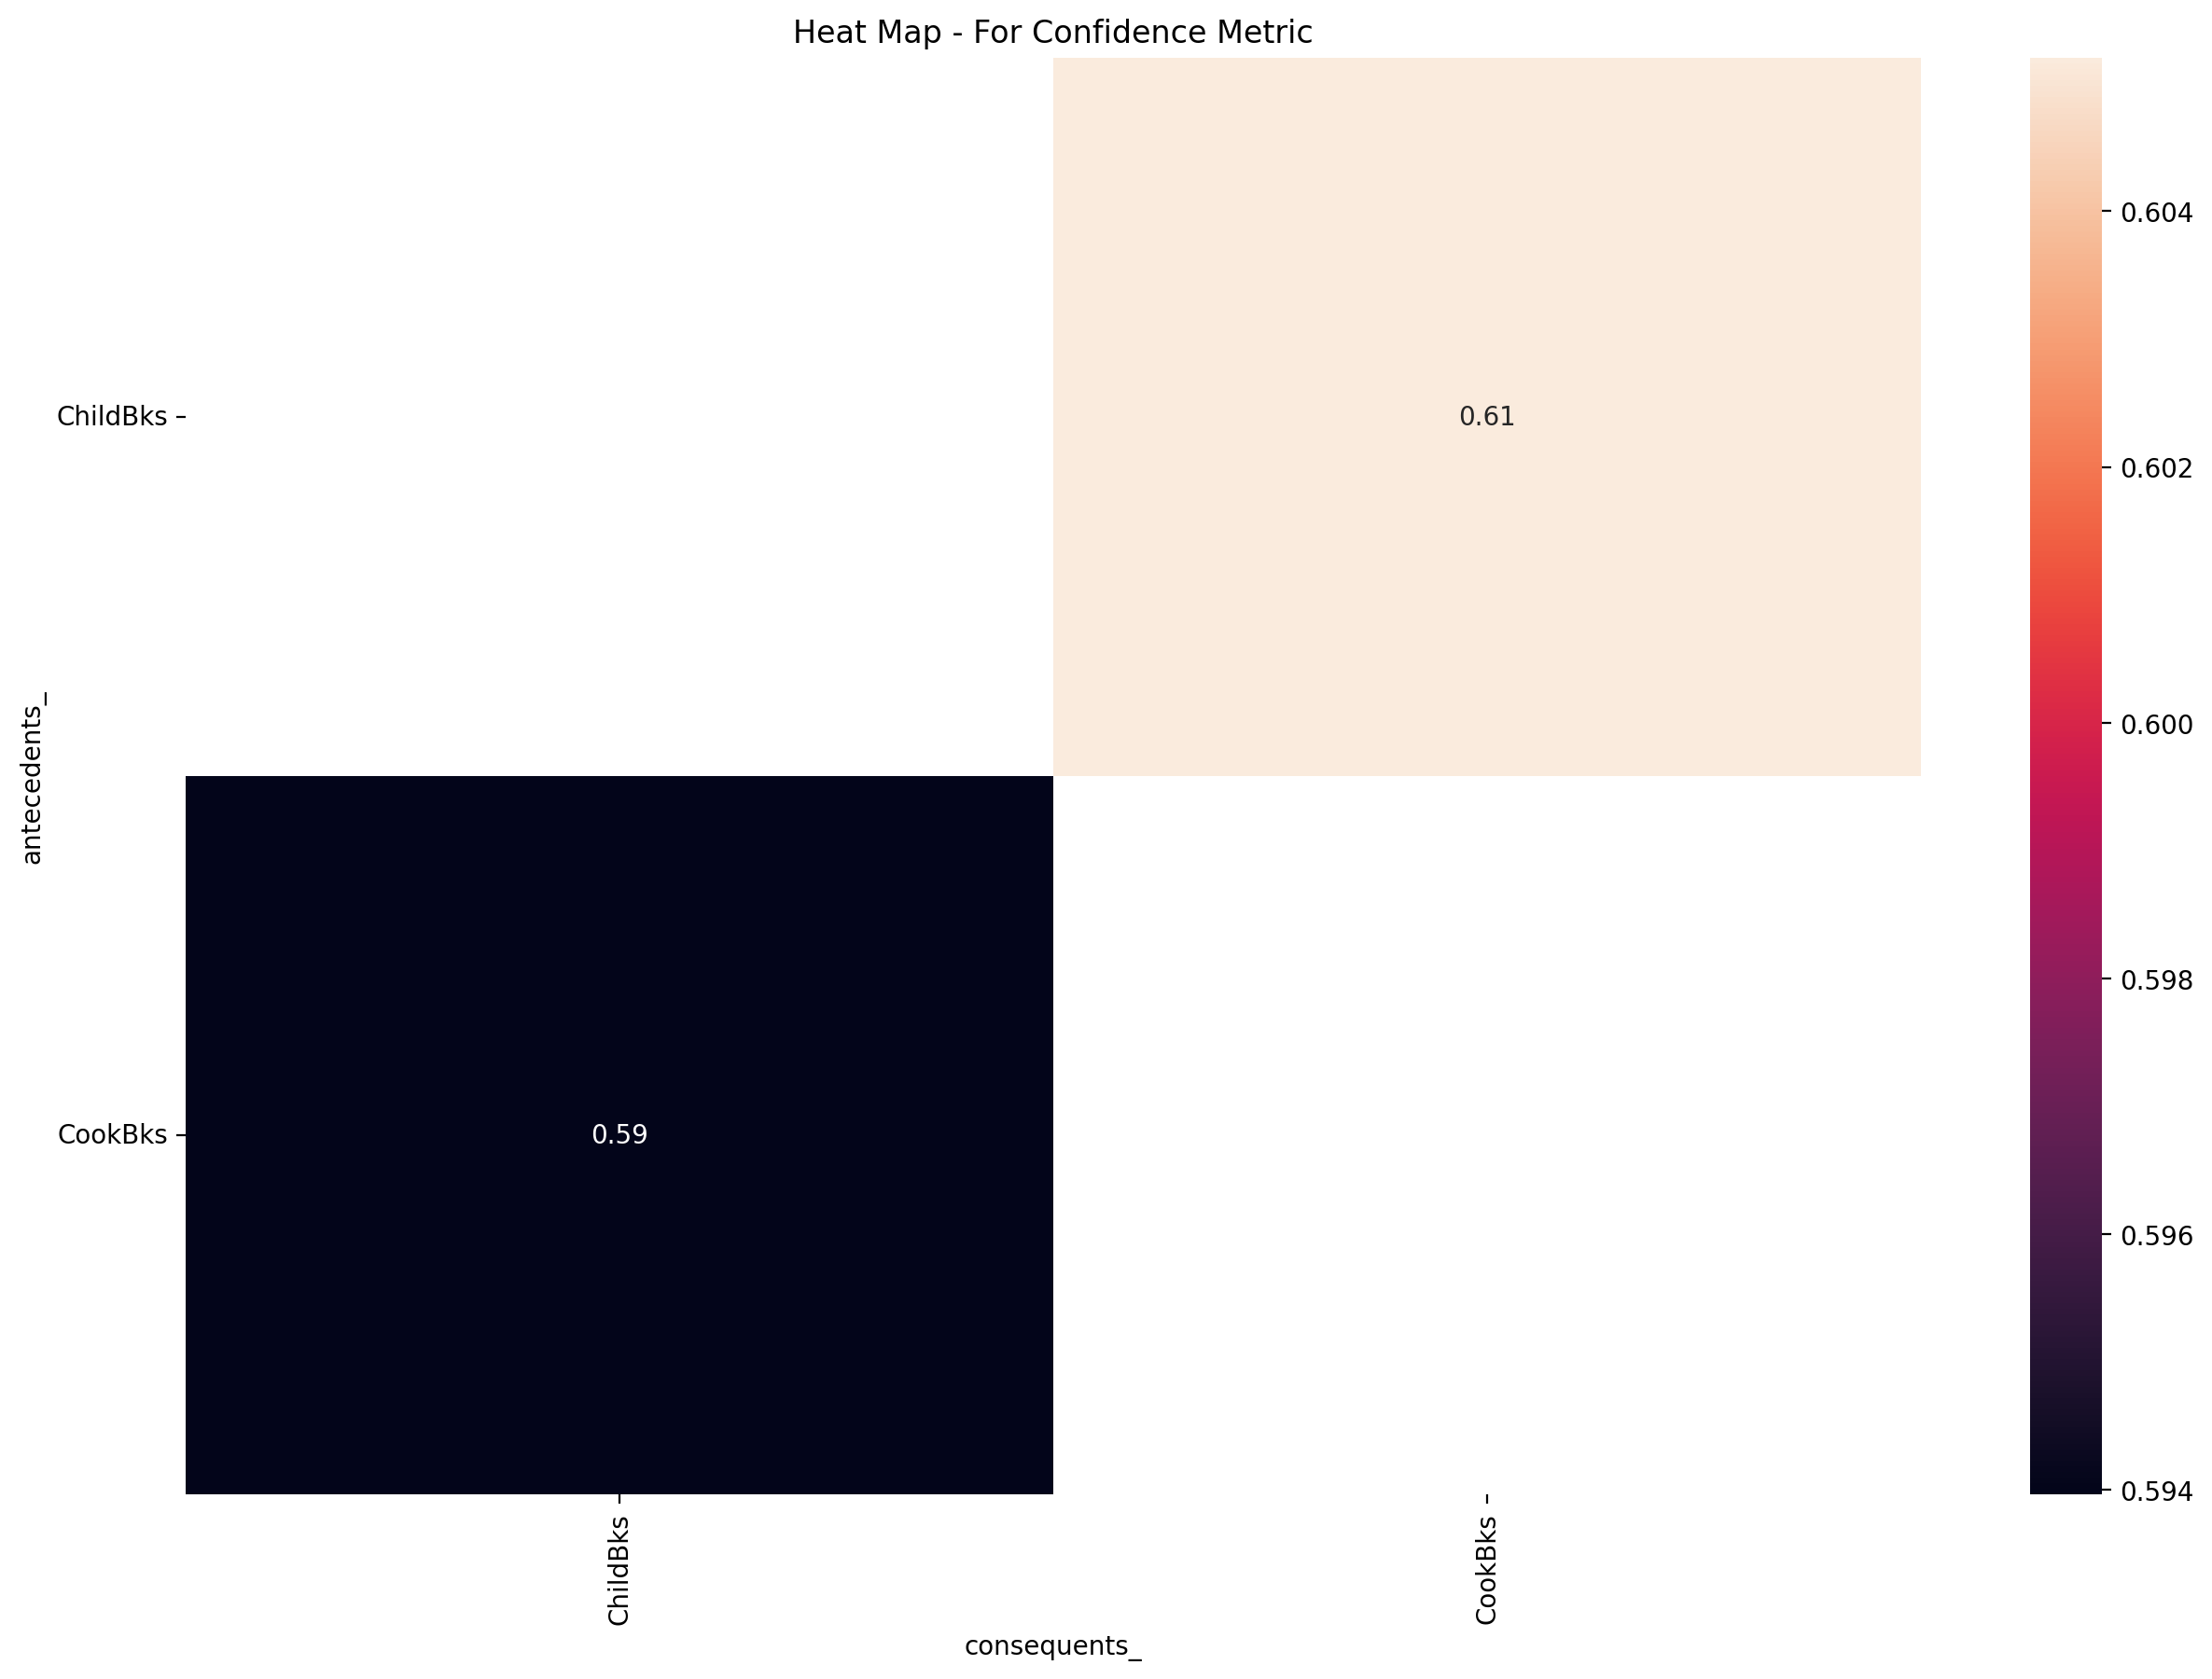

In [36]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>=1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

---------------------------------------------------------------------------------------------------------------------------

# (2) My_Movies

In [37]:
df = pd.read_csv(r"D:\Assignment\Association Rules\my_movies.csv")

In [38]:
df.describe()

Sixth Sense  Gladiator      LOTR1  Harry Potter1    Patriot      LOTR2  \
count    10.000000  10.000000  10.000000      10.000000  10.000000  10.000000   
mean      0.600000   0.700000   0.200000       0.200000   0.600000   0.200000   
std       0.516398   0.483046   0.421637       0.421637   0.516398   0.421637   
min       0.000000   0.000000   0.000000       0.000000   0.000000   0.000000   
25%       0.000000   0.250000   0.000000       0.000000   0.000000   0.000000   
50%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
75%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
max       1.000000   1.000000   1.000000       1.000000   1.000000   1.000000   

       Harry Potter2       LOTR  Braveheart  Green Mile  
count      10.000000  10.000000   10.000000   10.000000  
mean        0.100000   0.100000    0.100000    0.200000  
std         0.316228   0.316228    0.316228    0.421637  
min         0.000000   0.000000    0.000000    0.000000  
25%         0.000000   0.000000    0.000000    0.000000  
50%         0.000000   0.000000    0.000000    0.000000  
75%         0.000000   0.000000    0.000000    0.000000  
max         1.000000   1.000000    1.000000    1.000000

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [40]:
df.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [41]:
data = df.iloc[:,5:]
data

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

## Aprori Algorith

**Set minimun support value = 0.1**

In [42]:
frequent_items = apriori(data, min_support=0.1,use_colnames=True)
frequent_items

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Patriot, Sixth Sense, Gladiator)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Green Mile, Sixth Sense, Gladiator)
33      0.1                (Harry Potter1, LOTR1, Sixth Sense)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (Green Mile, LOTR1, Sixth Sense)
36      0.1                (Harry Potter1, Sixth Sense, LOTR2)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, LOTR2, Sixth Sense)
39      0.1                    (LOTR, Green Mile, Sixth Sense)
40      0.1                   (Braveheart, Patriot, Gladiator)
41      0.1                      (LOTR, Green Mile, Gladiator)
42      0.1                      (Harry Potter1, LOTR1, LOTR2)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (Green Mile, LOTR2, LOTR1)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (LOTR, Green Mile, Sixth Sense, Gladiator)
47      0.1         (Harry Potter1, LOTR1, Sixth Sense, LOTR2)
48      0.1    (Green Mile, Harry Potter1, LOTR1, Sixth Sense)
49      0.1            (Green Mile, LOTR2, LOTR1, Sixth Sense)
50      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR2)
51      0.1          (Green Mile, Harry Potter1, LOTR1, LOTR2)
52      0.1  (Green Mile, LOTR1, Harry Potter1, Sixth Sense...

### Model building

In [43]:
# Threshold = 0.2

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.2)
model

antecedents                                      consequents  \
0           (Sixth Sense)                                      (Gladiator)   
1             (Gladiator)                                    (Sixth Sense)   
2                 (LOTR1)                                    (Sixth Sense)   
3         (Harry Potter1)                                    (Sixth Sense)   
4               (Patriot)                                    (Sixth Sense)   
..                    ...                                              ...   
215  (LOTR2, Sixth Sense)               (Green Mile, Harry Potter1, LOTR1)   
216          (Green Mile)       (Harry Potter1, LOTR1, Sixth Sense, LOTR2)   
217               (LOTR1)  (Green Mile, Harry Potter1, Sixth Sense, LOTR2)   
218       (Harry Potter1)          (Green Mile, LOTR2, LOTR1, Sixth Sense)   
219               (LOTR2)  (Green Mile, Harry Potter1, LOTR1, Sixth Sense)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.6                 0.7      0.5    0.833333   1.190476   
1                   0.7                 0.6      0.5    0.714286   1.190476   
2                   0.2                 0.6      0.1    0.500000   0.833333   
3                   0.2                 0.6      0.1    0.500000   0.833333   
4                   0.6                 0.6      0.4    0.666667   1.111111   
..                  ...                 ...      ...         ...        ...   
215                 0.1                 0.1      0.1    1.000000  10.000000   
216                 0.2                 0.1      0.1    0.500000   5.000000   
217                 0.2                 0.1      0.1    0.500000   5.000000   
218                 0.2                 0.1      0.1    0.500000   5.000000   
219                 0.2                 0.1      0.1    0.500000   5.000000   

     leverage  conviction  
0        0.08         1.8  
1        0.08         1.4  
2       -0.02         0.8  
3       -0.02         0.8  
4        0.04         1.2  
..        ...         ...  
215      0.09         inf  
216      0.08         1.8  
217      0.08         1.8  
218      0.08         1.8  
219      0.08         1.8  

[220 rows x 9 columns]

In [44]:
model['lhs items'] = model['antecedents'].apply(lambda x : len(x))
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents                   consequents  \
134          (LOTR2, Sixth Sense)        (Harry Potter1, LOTR1)   
155           (Green Mile, LOTR2)          (LOTR1, Sixth Sense)   
173          (LOTR2, Sixth Sense)   (Green Mile, Harry Potter1)   
171  (Harry Potter1, Sixth Sense)           (Green Mile, LOTR2)   
170           (Green Mile, LOTR2)  (Harry Potter1, Sixth Sense)   

     antecedent support  consequent support  support  confidence  lift  \
134                 0.1                 0.1      0.1         1.0  10.0   
155                 0.1                 0.1      0.1         1.0  10.0   
173                 0.1                 0.1      0.1         1.0  10.0   
171                 0.1                 0.1      0.1         1.0  10.0   
170                 0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  lhs items  
134      0.09         inf          2  
155      0.09         inf          2  
173      0.09         inf          2  
171      0.09         inf          2  
170      0.09         inf          2

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(3.5, 0, 'Green Mile,Harry Potter1'),
  Text(4.5, 0, 'Green Mile,Harry Potter1,LOTR1'),
  Text(5.5, 0, 'Green Mile,Harry Potter1,LOTR2'),
  Text(6.5, 0, 'Green Mile,Harry Potter1,Sixth Sense'),
  Text(7.5, 0, 'Green Mile,LOTR1'),
  Text(8.5, 0, 'Green Mile,LOTR1,Sixth Sense'),
  Text(9.5, 0, 'Green Mile,LOTR2'),
  Text(10.5, 0, 'Green Mile,LOTR2,LOTR1'),
  Text(11.5, 0, 'Green Mile,LOTR2,Sixth Sense'),
  Text(12.5, 0, 'Green Mile,Sixth Sense'),
  Text(13.5, 0, 'Harry Potter1'),
  Text(14.5, 0, 'Harry Potter1,LOTR1'),
  Text(15.5, 0, 'Harry Potter1,LOTR1,LOTR2'),
  Text(16.5, 0, 'Harry Potter1,LOTR1,Sixth Sense'),
  Text(17.5, 0, 'Harry Potter1,LOTR2'),
  Text(18.

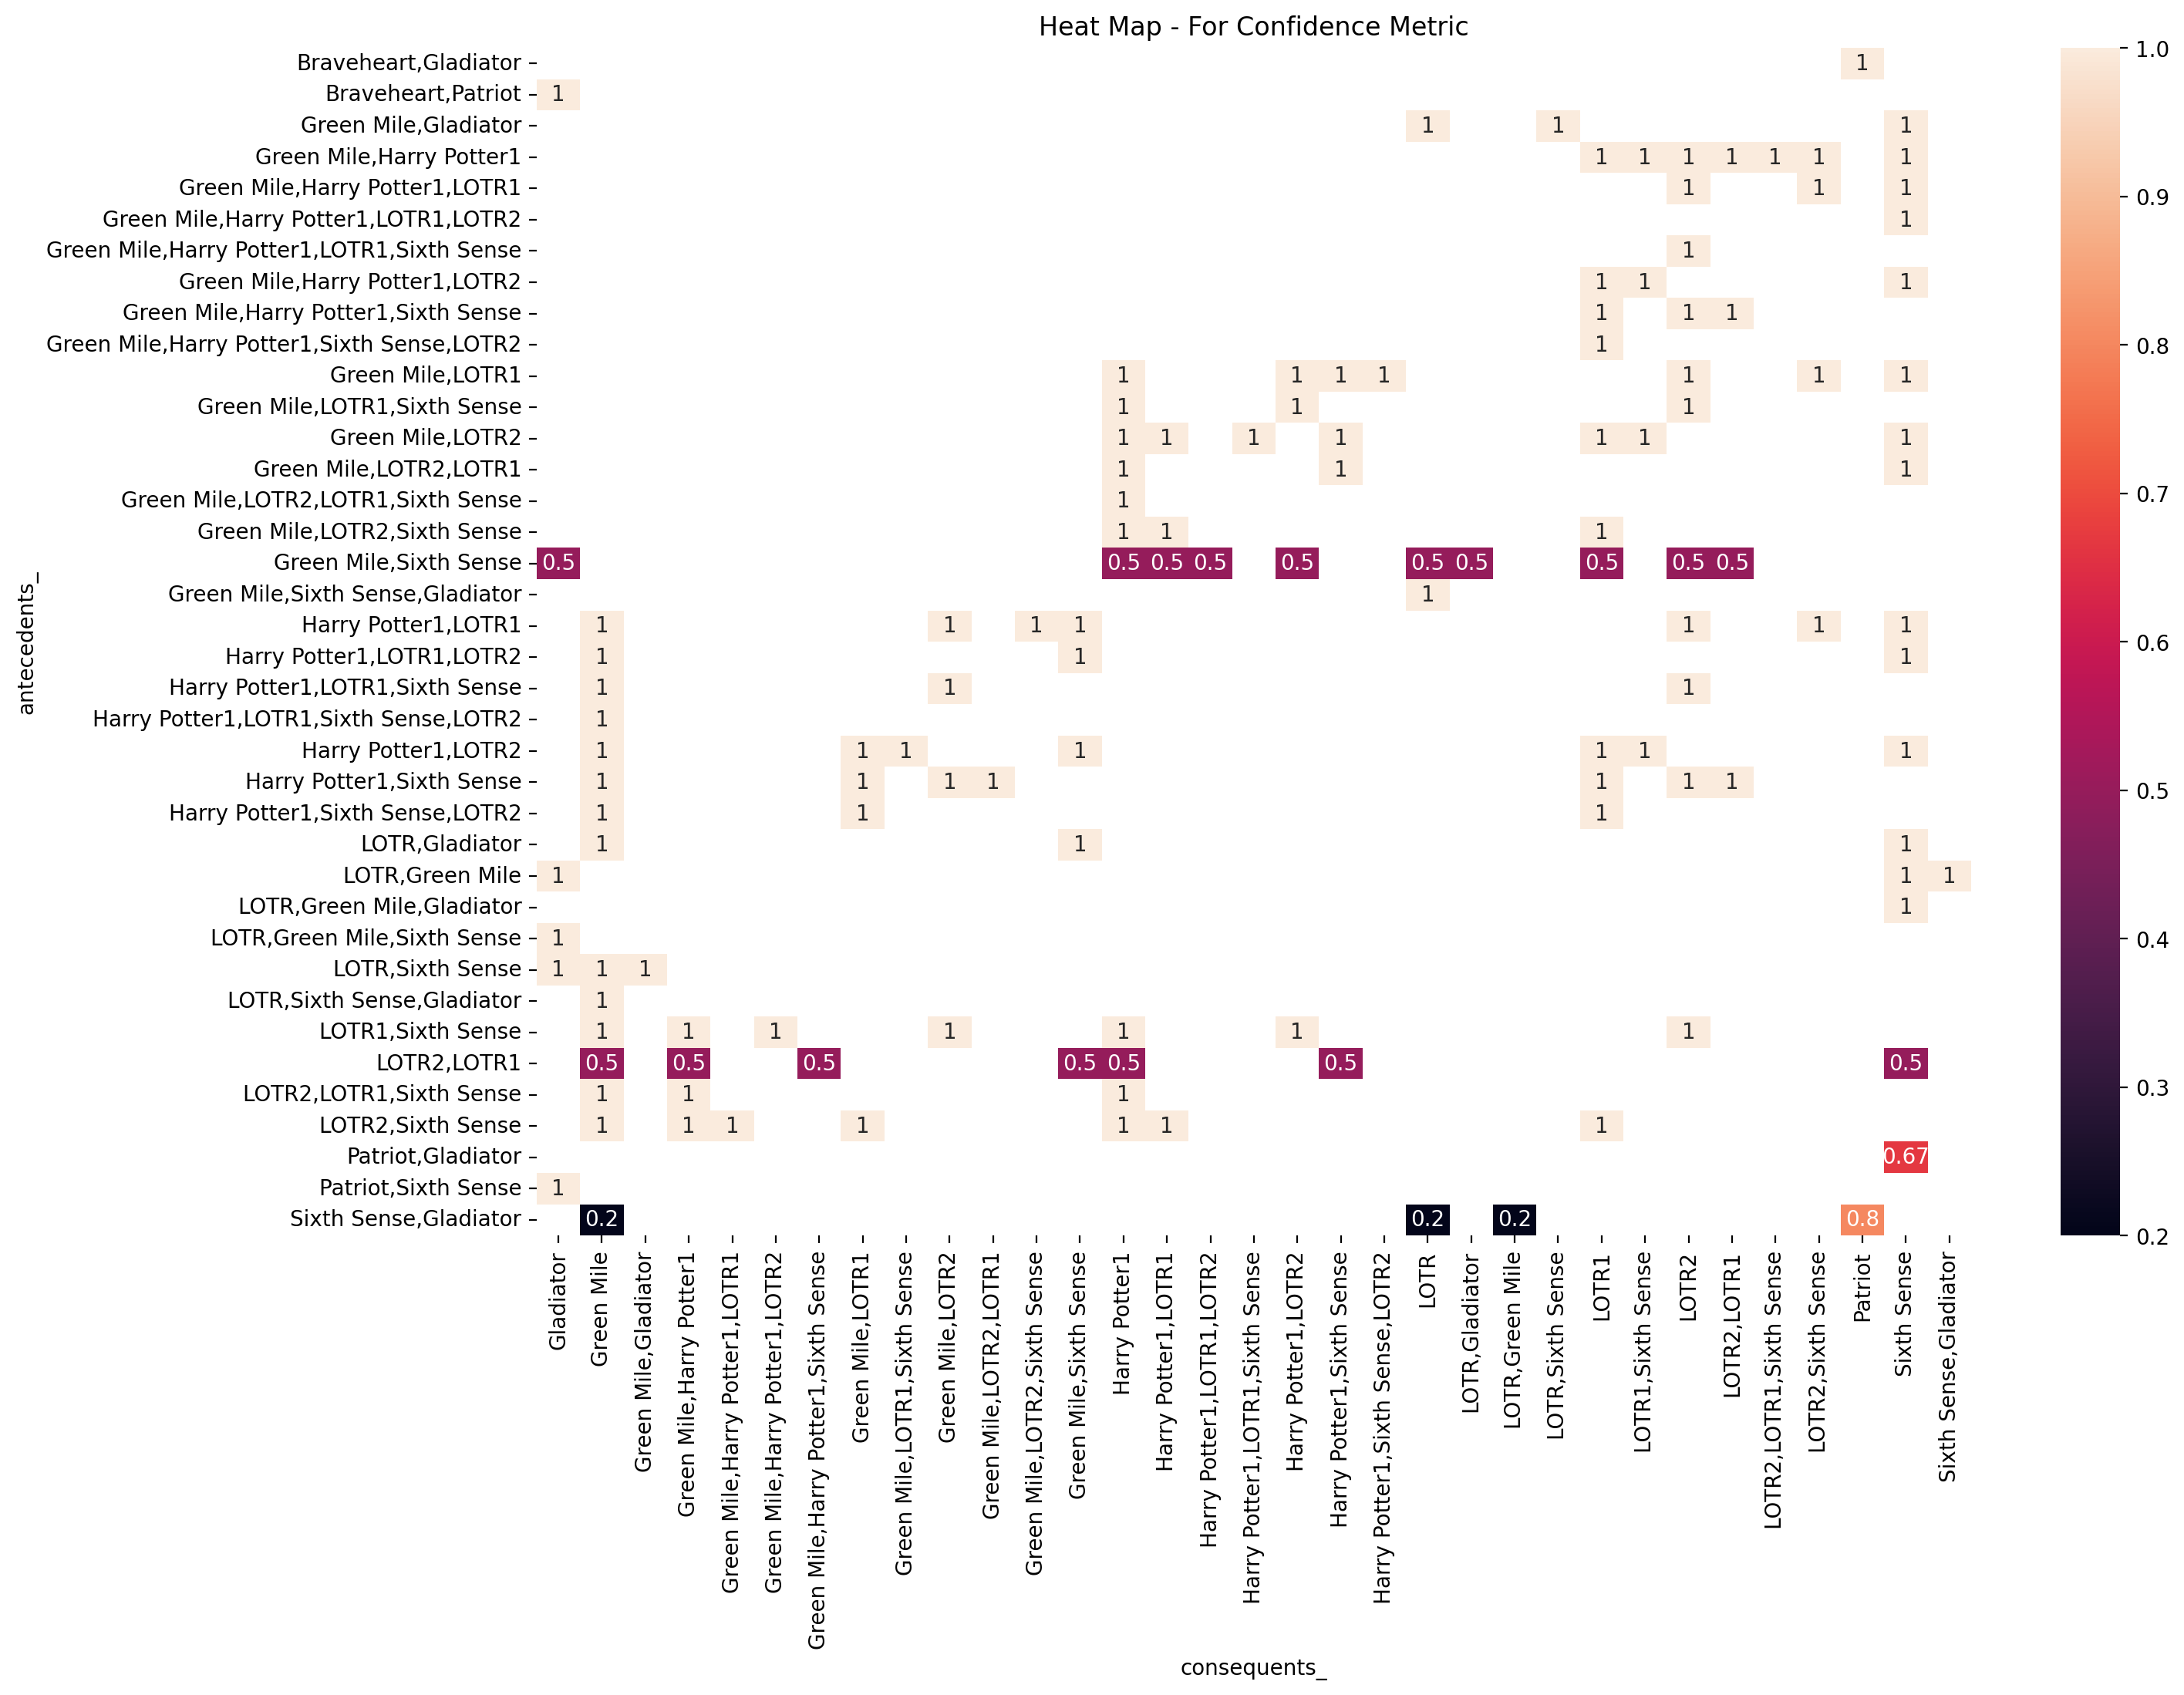

In [45]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [46]:
# Threshold = 0.6

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.6)
model

antecedents                         consequents  \
0                   (Sixth Sense)                         (Gladiator)   
1                     (Gladiator)                       (Sixth Sense)   
2                       (Patriot)                       (Sixth Sense)   
3                   (Sixth Sense)                           (Patriot)   
4                          (LOTR)                       (Sixth Sense)   
..                            ...                                 ...   
129        (Harry Potter1, LOTR1)    (Green Mile, LOTR2, Sixth Sense)   
130          (LOTR1, Sixth Sense)  (Green Mile, Harry Potter1, LOTR2)   
131  (Harry Potter1, Sixth Sense)          (Green Mile, LOTR2, LOTR1)   
132        (Harry Potter1, LOTR2)    (Green Mile, LOTR1, Sixth Sense)   
133          (LOTR2, Sixth Sense)  (Green Mile, Harry Potter1, LOTR1)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.6                 0.7      0.5    0.833333   1.190476   
1                   0.7                 0.6      0.5    0.714286   1.190476   
2                   0.6                 0.6      0.4    0.666667   1.111111   
3                   0.6                 0.6      0.4    0.666667   1.111111   
4                   0.1                 0.6      0.1    1.000000   1.666667   
..                  ...                 ...      ...         ...        ...   
129                 0.1                 0.1      0.1    1.000000  10.000000   
130                 0.1                 0.1      0.1    1.000000  10.000000   
131                 0.1                 0.1      0.1    1.000000  10.000000   
132                 0.1                 0.1      0.1    1.000000  10.000000   
133                 0.1                 0.1      0.1    1.000000  10.000000   

     leverage  conviction  
0        0.08         1.8  
1        0.08         1.4  
2        0.04         1.2  
3        0.04         1.2  
4        0.04         inf  
..        ...         ...  
129      0.09         inf  
130      0.09         inf  
131      0.09         inf  
132      0.09         inf  
133      0.09         inf  

[134 rows x 9 columns]

In [47]:
model['lhs items'] = model['antecedents'].apply(lambda x : len(x))
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents                         consequents  \
133     (LOTR2, Sixth Sense)  (Green Mile, Harry Potter1, LOTR1)   
92      (LOTR1, Sixth Sense)                 (Green Mile, LOTR2)   
46   (Green Mile, Gladiator)                              (LOTR)   
107      (Green Mile, LOTR1)              (Harry Potter1, LOTR2)   
81       (Green Mile, LOTR1)        (Harry Potter1, Sixth Sense)   

     antecedent support  consequent support  support  confidence  lift  \
133                 0.1                 0.1      0.1         1.0  10.0   
92                  0.1                 0.1      0.1         1.0  10.0   
46                  0.1                 0.1      0.1         1.0  10.0   
107                 0.1                 0.1      0.1         1.0  10.0   
81                  0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  lhs items  
133      0.09         inf          2  
92       0.09         inf          2  
46       0.09         inf          2  
107      0.09         inf          2  
81       0.09         inf          2

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(3.5, 0, 'Green Mile,Harry Potter1'),
  Text(4.5, 0, 'Green Mile,Harry Potter1,LOTR1'),
  Text(5.5, 0, 'Green Mile,Harry Potter1,LOTR2'),
  Text(6.5, 0, 'Green Mile,LOTR1'),
  Text(7.5, 0, 'Green Mile,LOTR1,Sixth Sense'),
  Text(8.5, 0, 'Green Mile,LOTR2'),
  Text(9.5, 0, 'Green Mile,LOTR2,LOTR1'),
  Text(10.5, 0, 'Green Mile,LOTR2,Sixth Sense'),
  Text(11.5, 0, 'Green Mile,Sixth Sense'),
  Text(12.5, 0, 'Harry Potter1'),
  Text(13.5, 0, 'Harry Potter1,LOTR1'),
  Text(14.5, 0, 'Harry Potter1,LOTR1,Sixth Sense'),
  Text(15.5, 0, 'Harry Potter1,LOTR2'),
  Text(16.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(17.5, 0, 'Harry Potter1,Sixth Sense,LOTR2'),
  Text(18.5, 0, 'LOTR'),
  Text(19.5, 0

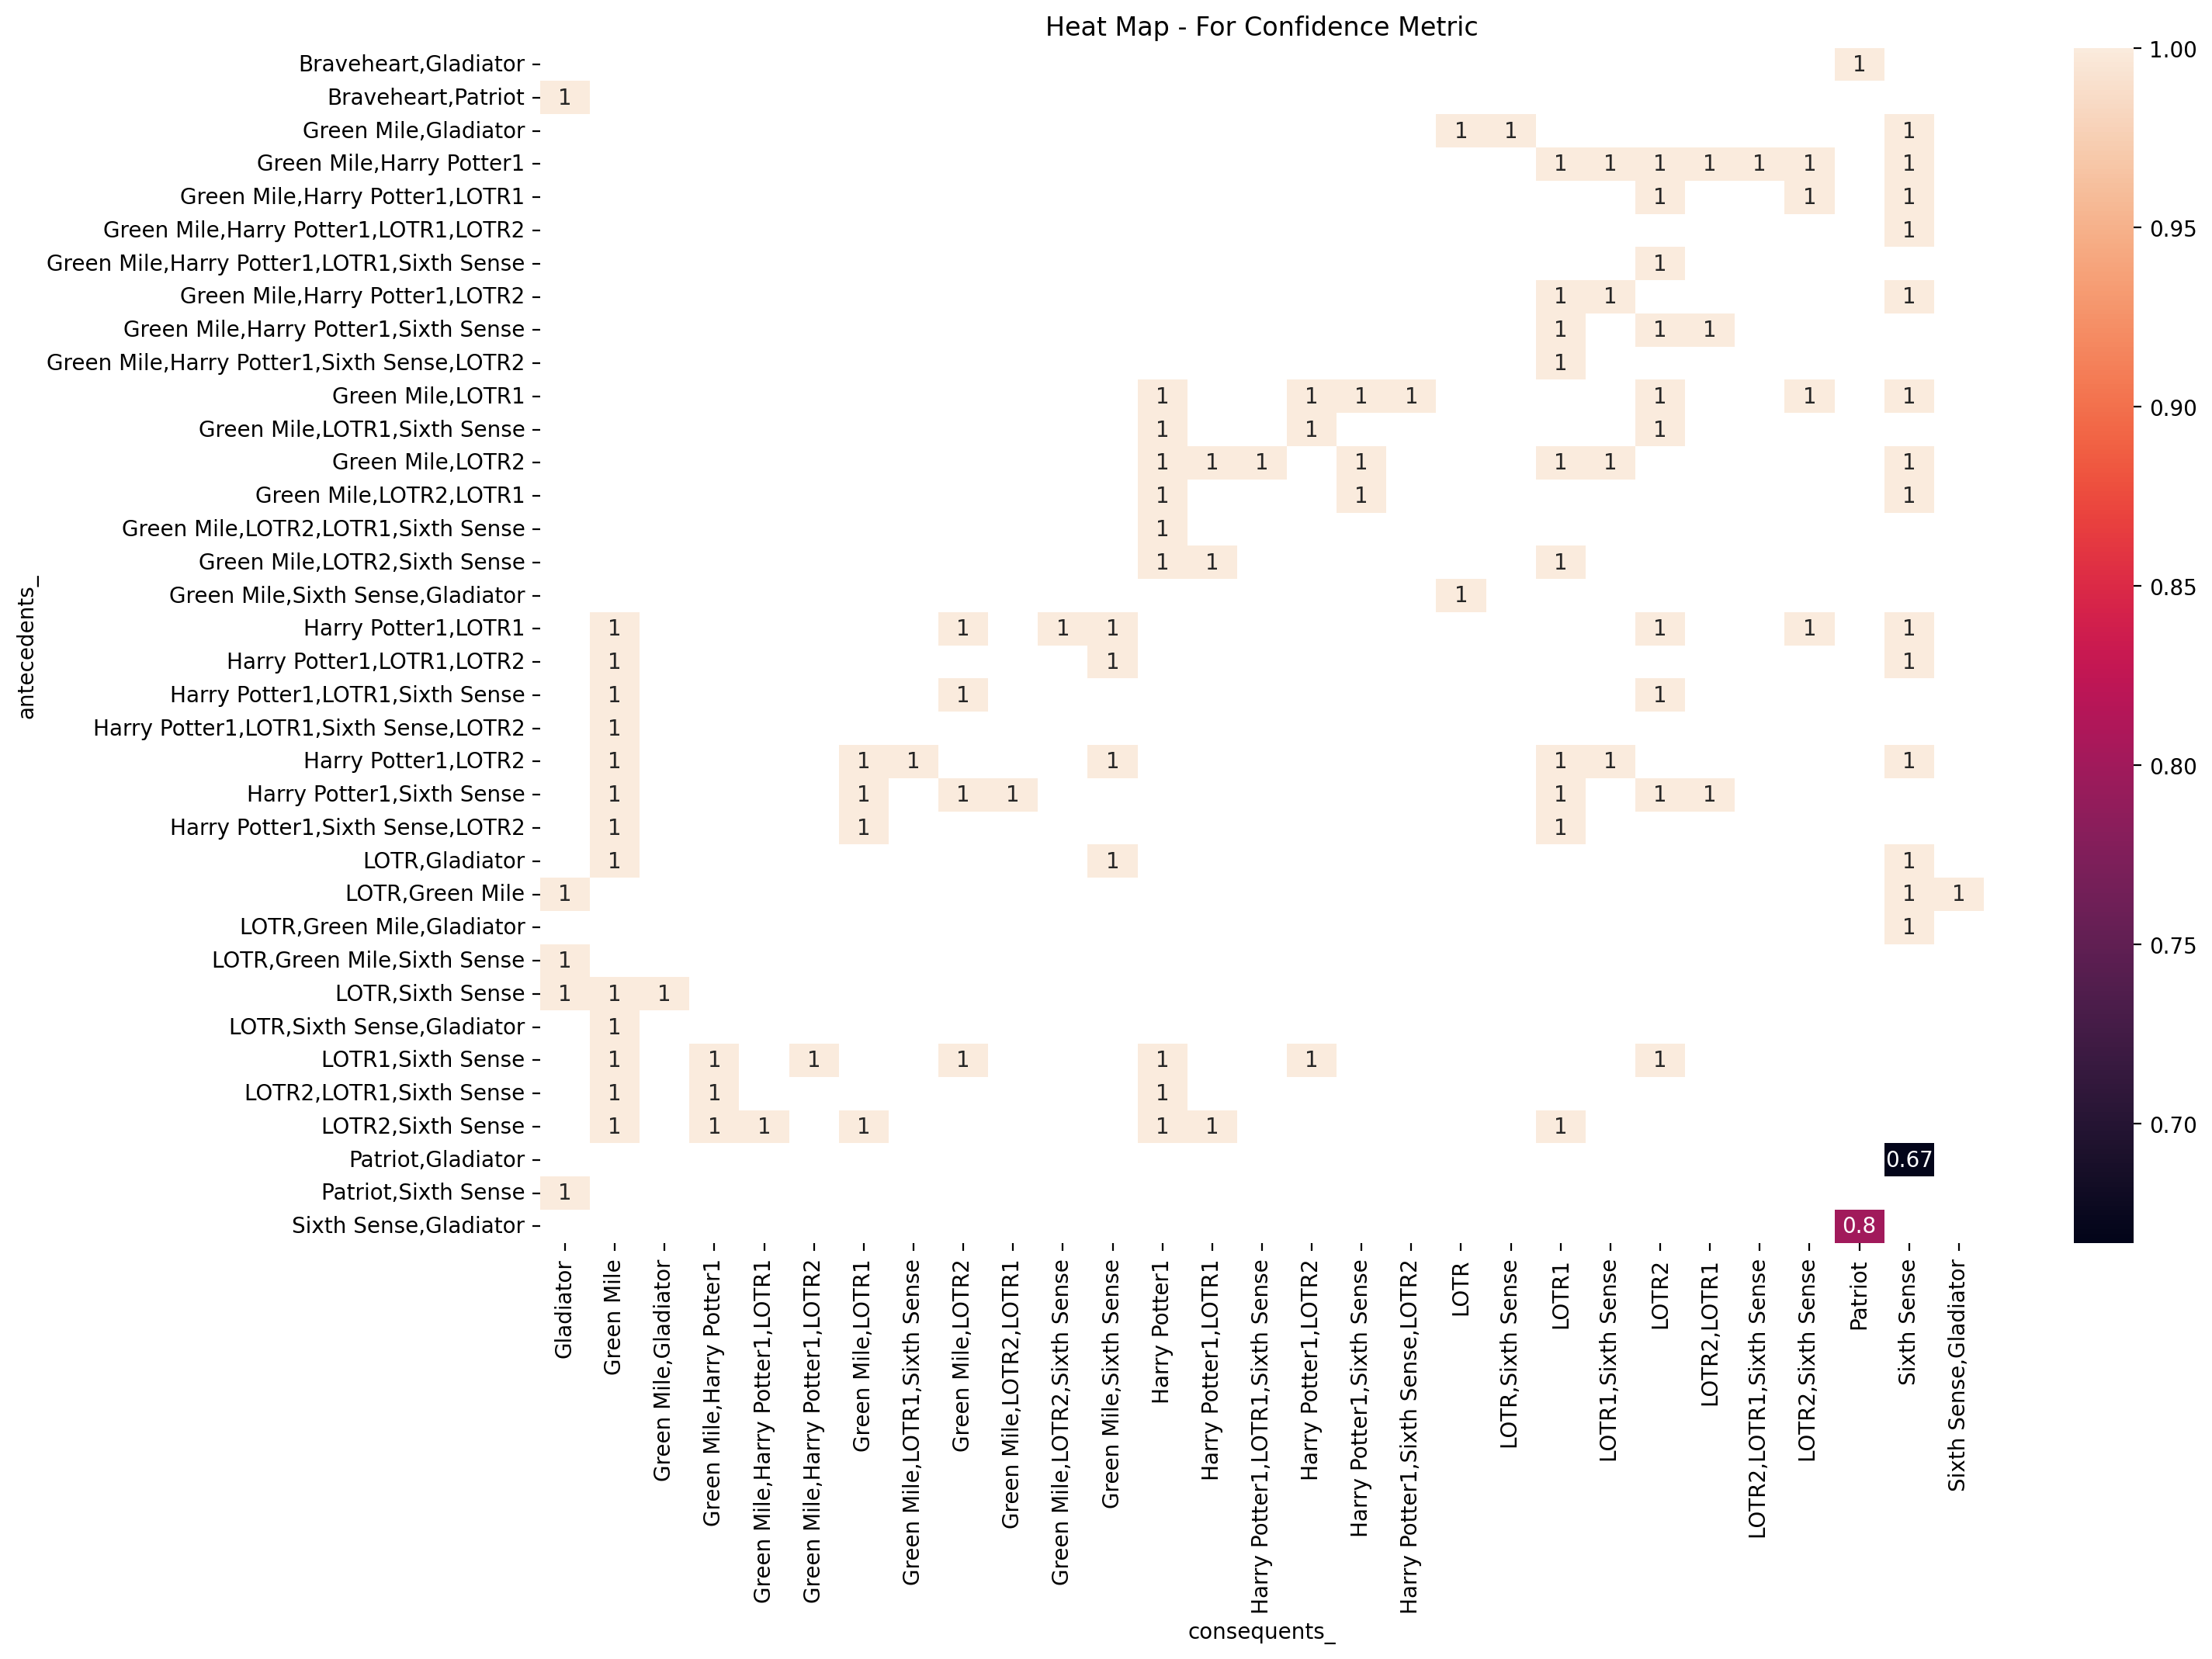

In [48]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [49]:
# Threshold = 0.8

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.8)
model

antecedents                         consequents  \
0                   (Sixth Sense)                         (Gladiator)   
1                          (LOTR)                       (Sixth Sense)   
2                    (Green Mile)                       (Sixth Sense)   
3                       (Patriot)                         (Gladiator)   
4                     (Gladiator)                           (Patriot)   
..                            ...                                 ...   
123        (Harry Potter1, LOTR1)    (Green Mile, LOTR2, Sixth Sense)   
124          (LOTR1, Sixth Sense)  (Green Mile, Harry Potter1, LOTR2)   
125  (Harry Potter1, Sixth Sense)          (Green Mile, LOTR2, LOTR1)   
126        (Harry Potter1, LOTR2)    (Green Mile, LOTR1, Sixth Sense)   
127          (LOTR2, Sixth Sense)  (Green Mile, Harry Potter1, LOTR1)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.6                 0.7      0.5    0.833333   1.190476   
1                   0.1                 0.6      0.1    1.000000   1.666667   
2                   0.2                 0.6      0.2    1.000000   1.666667   
3                   0.6                 0.7      0.6    1.000000   1.428571   
4                   0.7                 0.6      0.6    0.857143   1.428571   
..                  ...                 ...      ...         ...        ...   
123                 0.1                 0.1      0.1    1.000000  10.000000   
124                 0.1                 0.1      0.1    1.000000  10.000000   
125                 0.1                 0.1      0.1    1.000000  10.000000   
126                 0.1                 0.1      0.1    1.000000  10.000000   
127                 0.1                 0.1      0.1    1.000000  10.000000   

     leverage  conviction  
0        0.08         1.8  
1        0.04         inf  
2        0.08         inf  
3        0.18         inf  
4        0.18         2.8  
..        ...         ...  
123      0.09         inf  
124      0.09         inf  
125      0.09         inf  
126      0.09         inf  
127      0.09         inf  

[128 rows x 9 columns]

In [50]:
model['lhs items'] = model['antecedents'].apply(lambda x : len(x))
model[model['lhs items']>1].sort_values('lift', ascending=False).head()

antecedents                         consequents  \
127  (LOTR2, Sixth Sense)  (Green Mile, Harry Potter1, LOTR1)   
86   (LOTR1, Sixth Sense)                 (Green Mile, LOTR2)   
102   (Green Mile, LOTR2)              (Harry Potter1, LOTR1)   
101   (Green Mile, LOTR1)              (Harry Potter1, LOTR2)   
95   (LOTR2, Sixth Sense)         (Green Mile, Harry Potter1)   

     antecedent support  consequent support  support  confidence  lift  \
127                 0.1                 0.1      0.1         1.0  10.0   
86                  0.1                 0.1      0.1         1.0  10.0   
102                 0.1                 0.1      0.1         1.0  10.0   
101                 0.1                 0.1      0.1         1.0  10.0   
95                  0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  lhs items  
127      0.09         inf          2  
86       0.09         inf          2  
102      0.09         inf          2  
101      0.09         inf          2  
95       0.09         inf          2

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Green Mile'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(3.5, 0, 'Green Mile,Harry Potter1'),
  Text(4.5, 0, 'Green Mile,Harry Potter1,LOTR1'),
  Text(5.5, 0, 'Green Mile,Harry Potter1,LOTR2'),
  Text(6.5, 0, 'Green Mile,LOTR1'),
  Text(7.5, 0, 'Green Mile,LOTR1,Sixth Sense'),
  Text(8.5, 0, 'Green Mile,LOTR2'),
  Text(9.5, 0, 'Green Mile,LOTR2,LOTR1'),
  Text(10.5, 0, 'Green Mile,LOTR2,Sixth Sense'),
  Text(11.5, 0, 'Green Mile,Sixth Sense'),
  Text(12.5, 0, 'Harry Potter1'),
  Text(13.5, 0, 'Harry Potter1,LOTR1'),
  Text(14.5, 0, 'Harry Potter1,LOTR1,Sixth Sense'),
  Text(15.5, 0, 'Harry Potter1,LOTR2'),
  Text(16.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(17.5, 0, 'Harry Potter1,Sixth Sense,LOTR2'),
  Text(18.5, 0, 'LOTR'),
  Text(19.5, 0

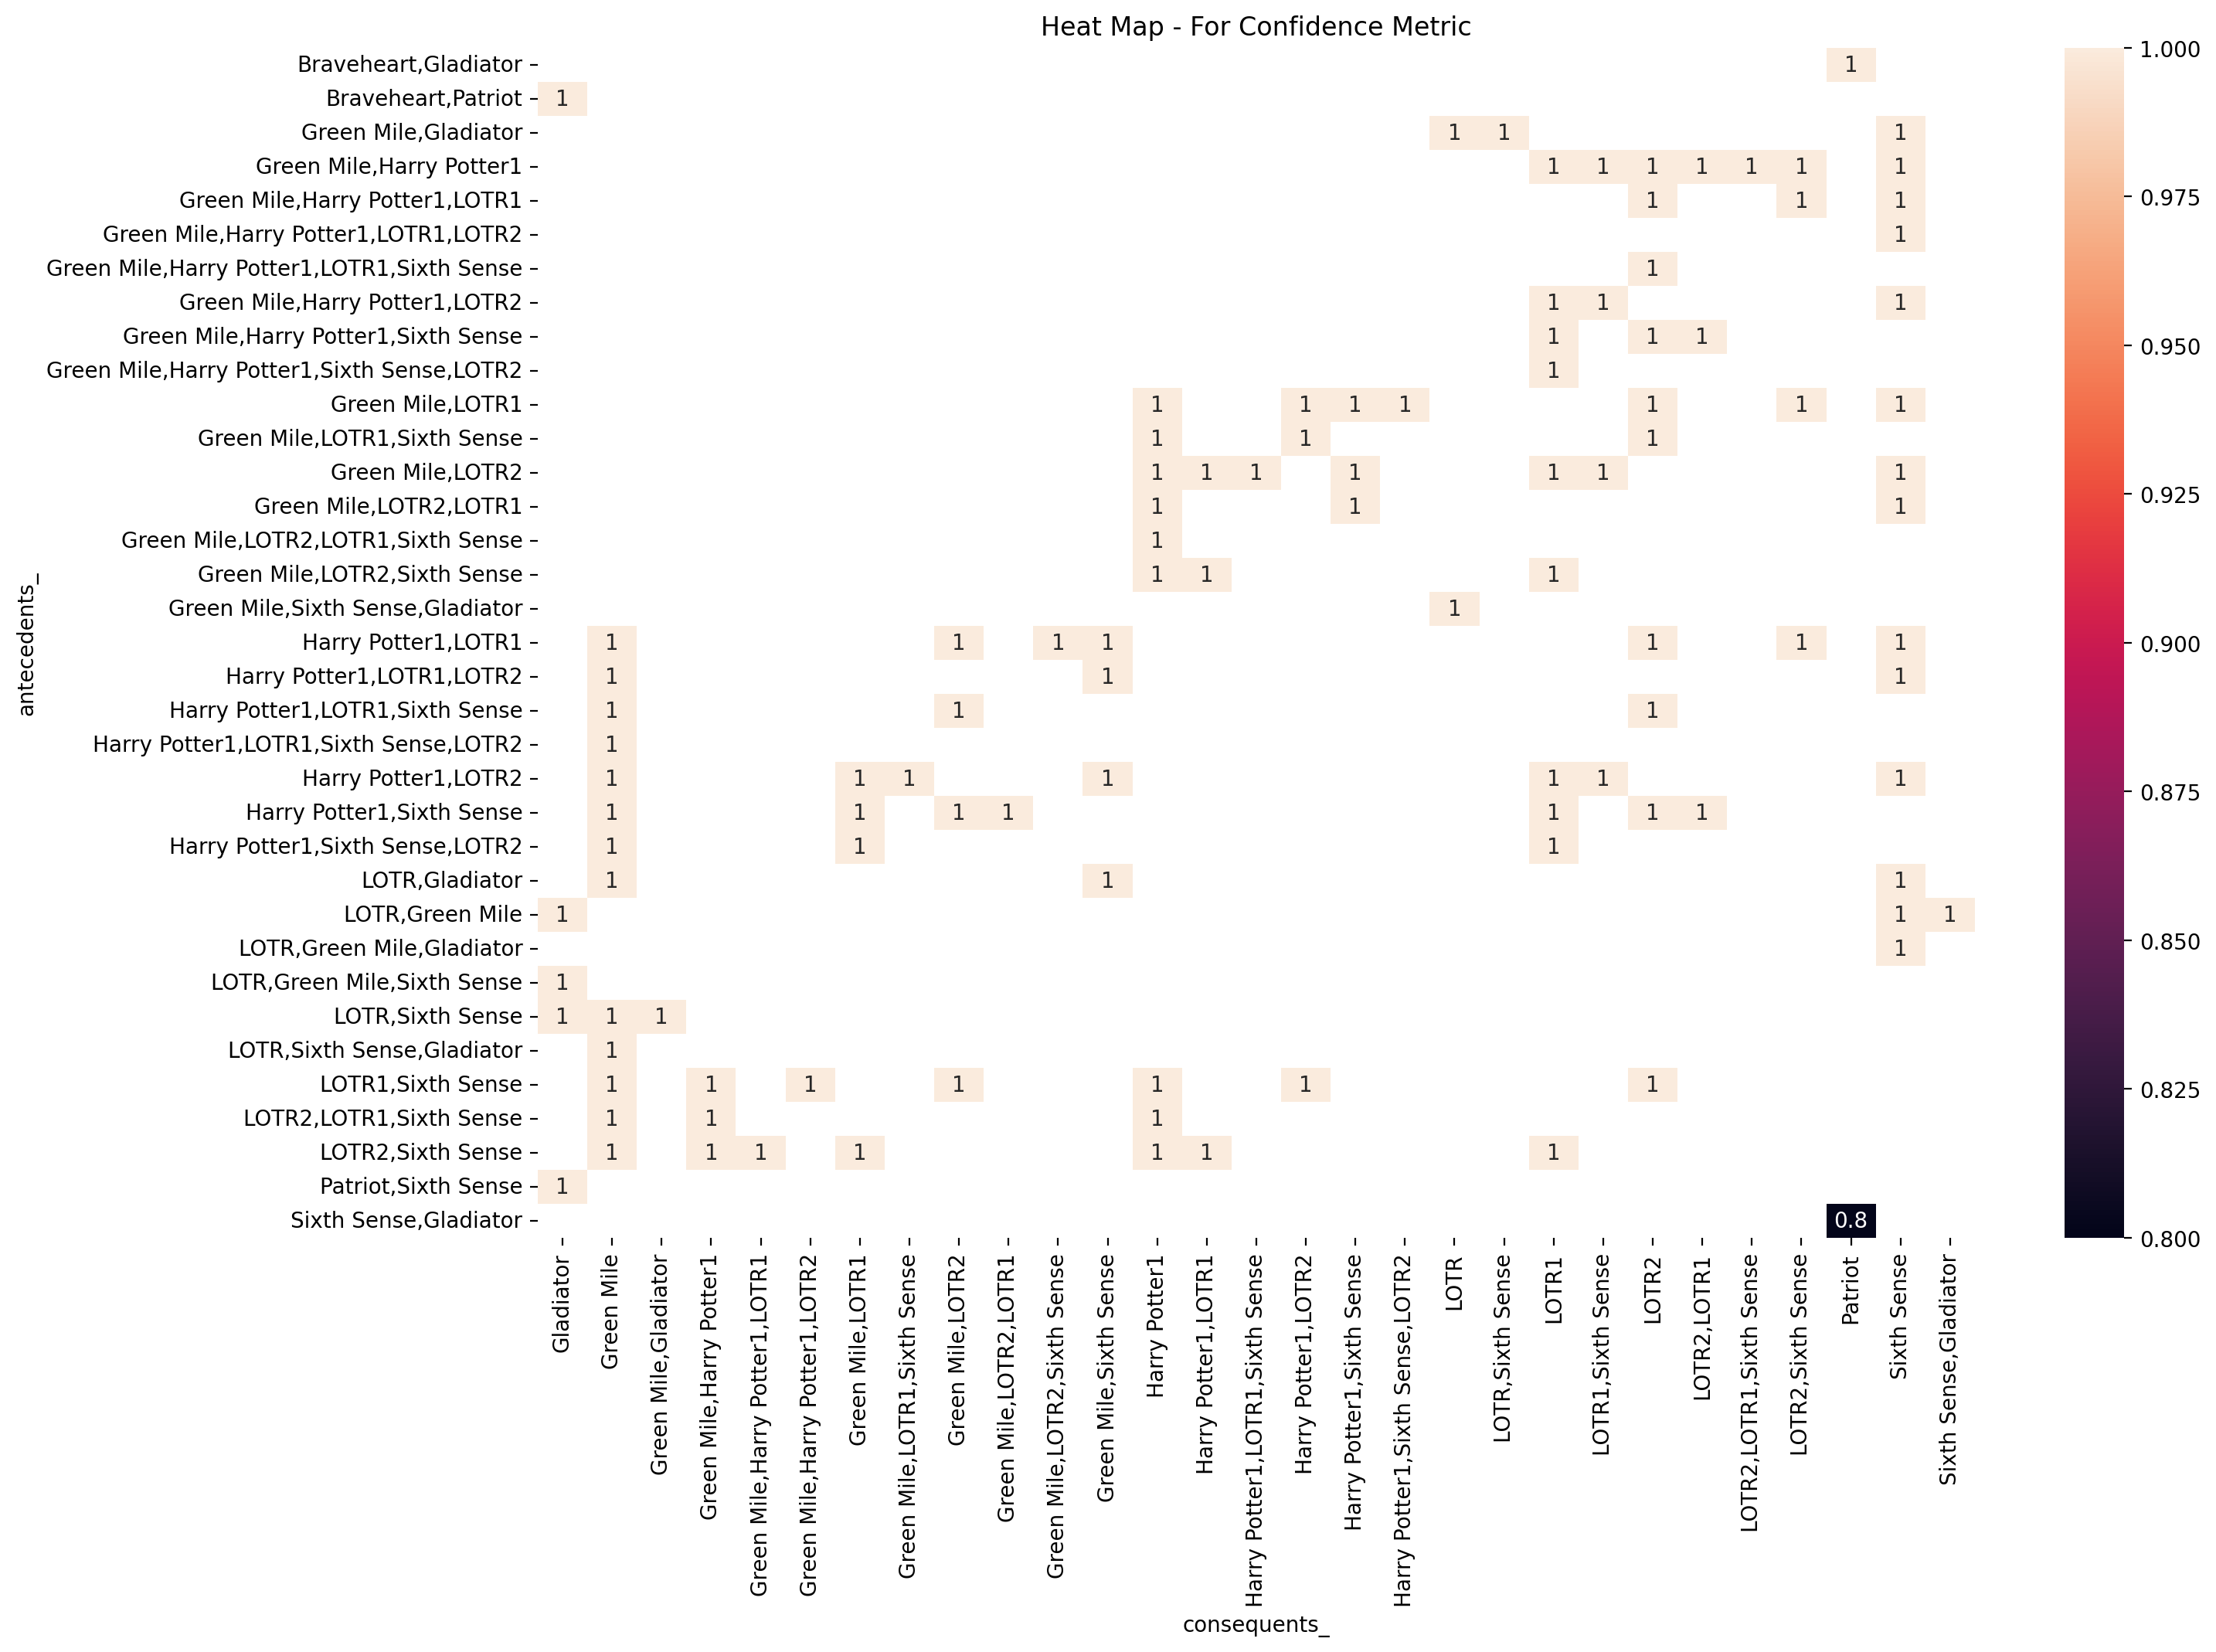

In [51]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

**Set Minimun support value = 0.2**

In [52]:
frequent_items = apriori(data, min_support=0.2,use_colnames=True)
frequent_items

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Patriot, Sixth Sense)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Patriot, Sixth Sense, Gladiator)

In [53]:
# Threshold = 0.2

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.2)
model

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
12  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
13                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
14             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
15               (Gladiator)    (Patriot, Sixth Sense)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.666667  1.111111      0.04         1.2  
12                 0.6      0.4    0.800000  1.333333      0.10         2.0  
13                 0.5      0.4    0.666667  1.333333      0.10         1.5  
14                 0.6      0.4    0.666667  1.111111      0.04         1.2  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [54]:
model['lhs items'] = model['antecedents'].apply(lambda x : len(x))
model[model['lhs items']>1].sort_values('lift', ascending=False)

antecedents    consequents  antecedent support  \
10    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
12  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
11      (Patriot, Gladiator)  (Sixth Sense)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
10                 0.7      0.4    1.000000  1.428571      0.12         inf   
12                 0.6      0.4    0.800000  1.333333      0.10         2.0   
11                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    lhs items  
10          2  
12          2  
11          2

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

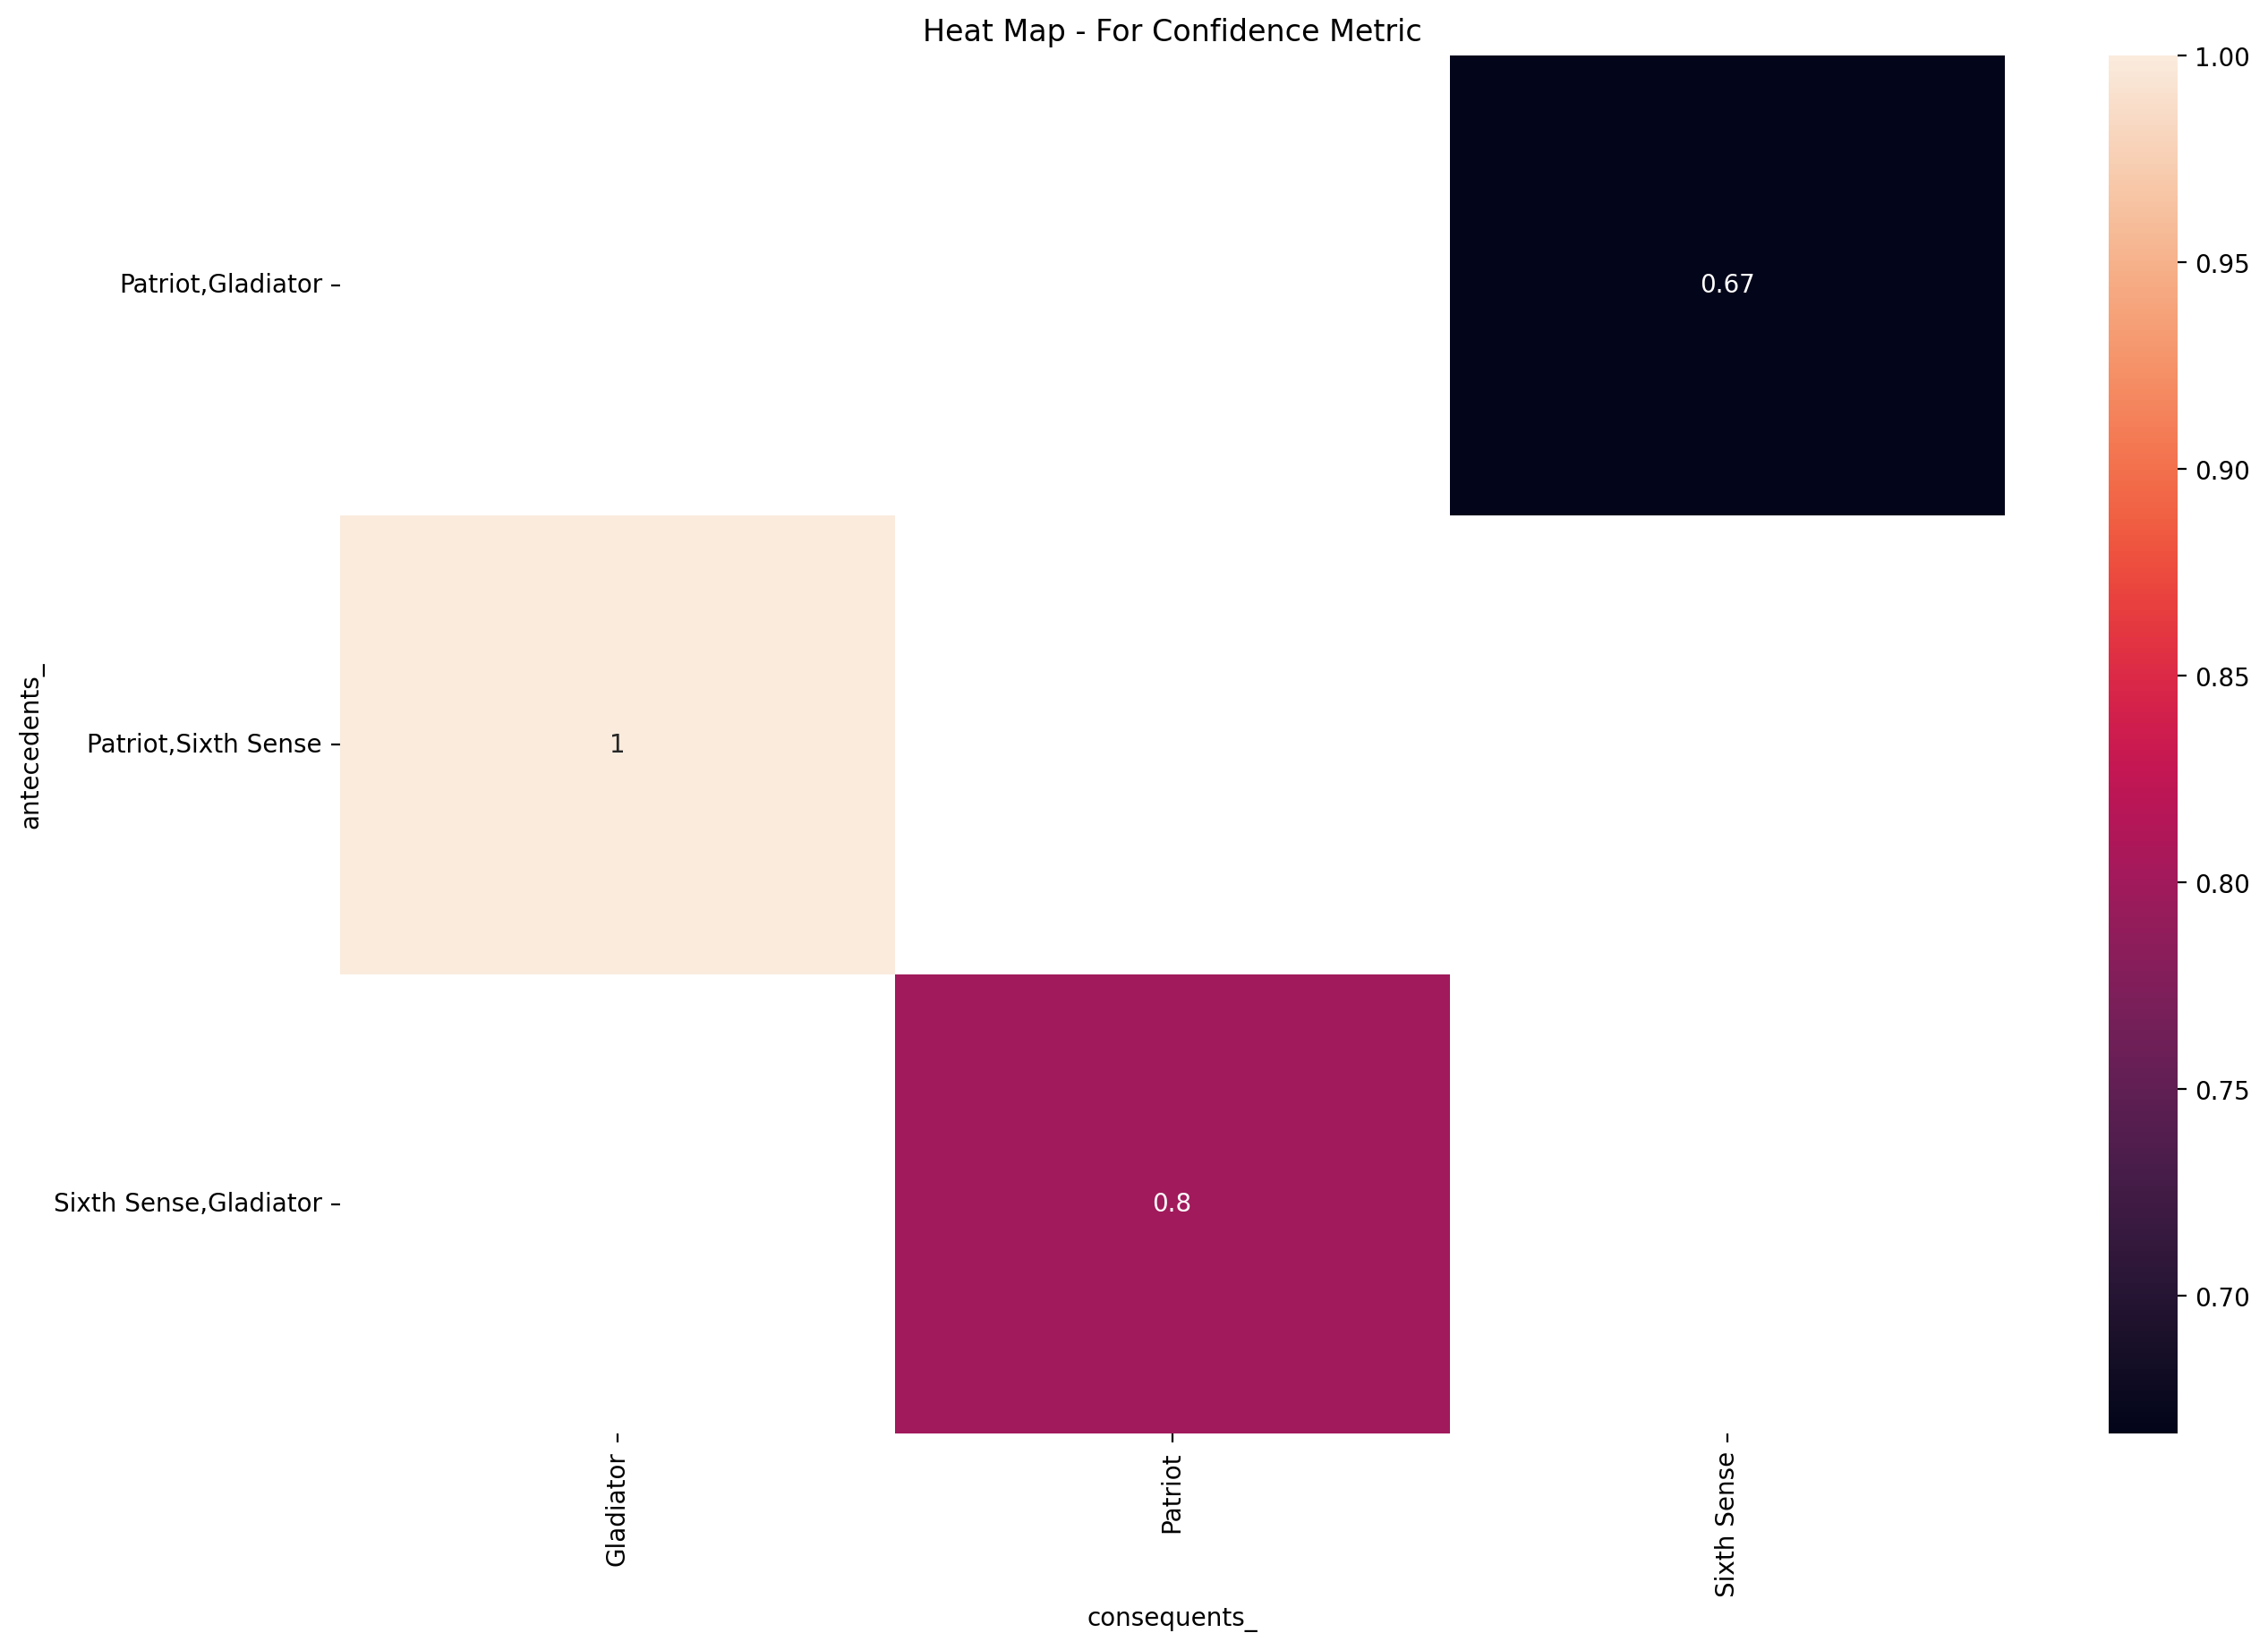

In [55]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [56]:
# Threshold = 0.8

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.8)
model

antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1              (Green Mile)  (Sixth Sense)                 0.2   
2                 (Patriot)    (Gladiator)                 0.6   
3               (Gladiator)      (Patriot)                 0.7   
4                   (LOTR2)        (LOTR1)                 0.2   
5                   (LOTR1)        (LOTR2)                 0.2   
6    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
7  (Sixth Sense, Gladiator)      (Patriot)                 0.5   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.2    1.000000  1.666667      0.08         inf  
2                 0.7      0.6    1.000000  1.428571      0.18         inf  
3                 0.6      0.6    0.857143  1.428571      0.18         2.8  
4                 0.2      0.2    1.000000  5.000000      0.16         inf  
5                 0.2      0.2    1.000000  5.000000      0.16         inf  
6                 0.7      0.4    1.000000  1.428571      0.12         inf  
7                 0.6      0.4    0.800000  1.333333      0.10         2.0

In [57]:
model['lhs items'] = model['antecedents'].apply(lambda x : len(x))
model[model['lhs items']>1].sort_values('lift', ascending=False)

antecedents  consequents  antecedent support  \
6    (Patriot, Sixth Sense)  (Gladiator)                 0.4   
7  (Sixth Sense, Gladiator)    (Patriot)                 0.5   

   consequent support  support  confidence      lift  leverage  conviction  \
6                 0.7      0.4         1.0  1.428571      0.12         inf   
7                 0.6      0.4         0.8  1.333333      0.10         2.0   

   lhs items  
6          2  
7          2

(array([0.5, 1.5]), [Text(0.5, 0, 'Gladiator'), Text(1.5, 0, 'Patriot')])

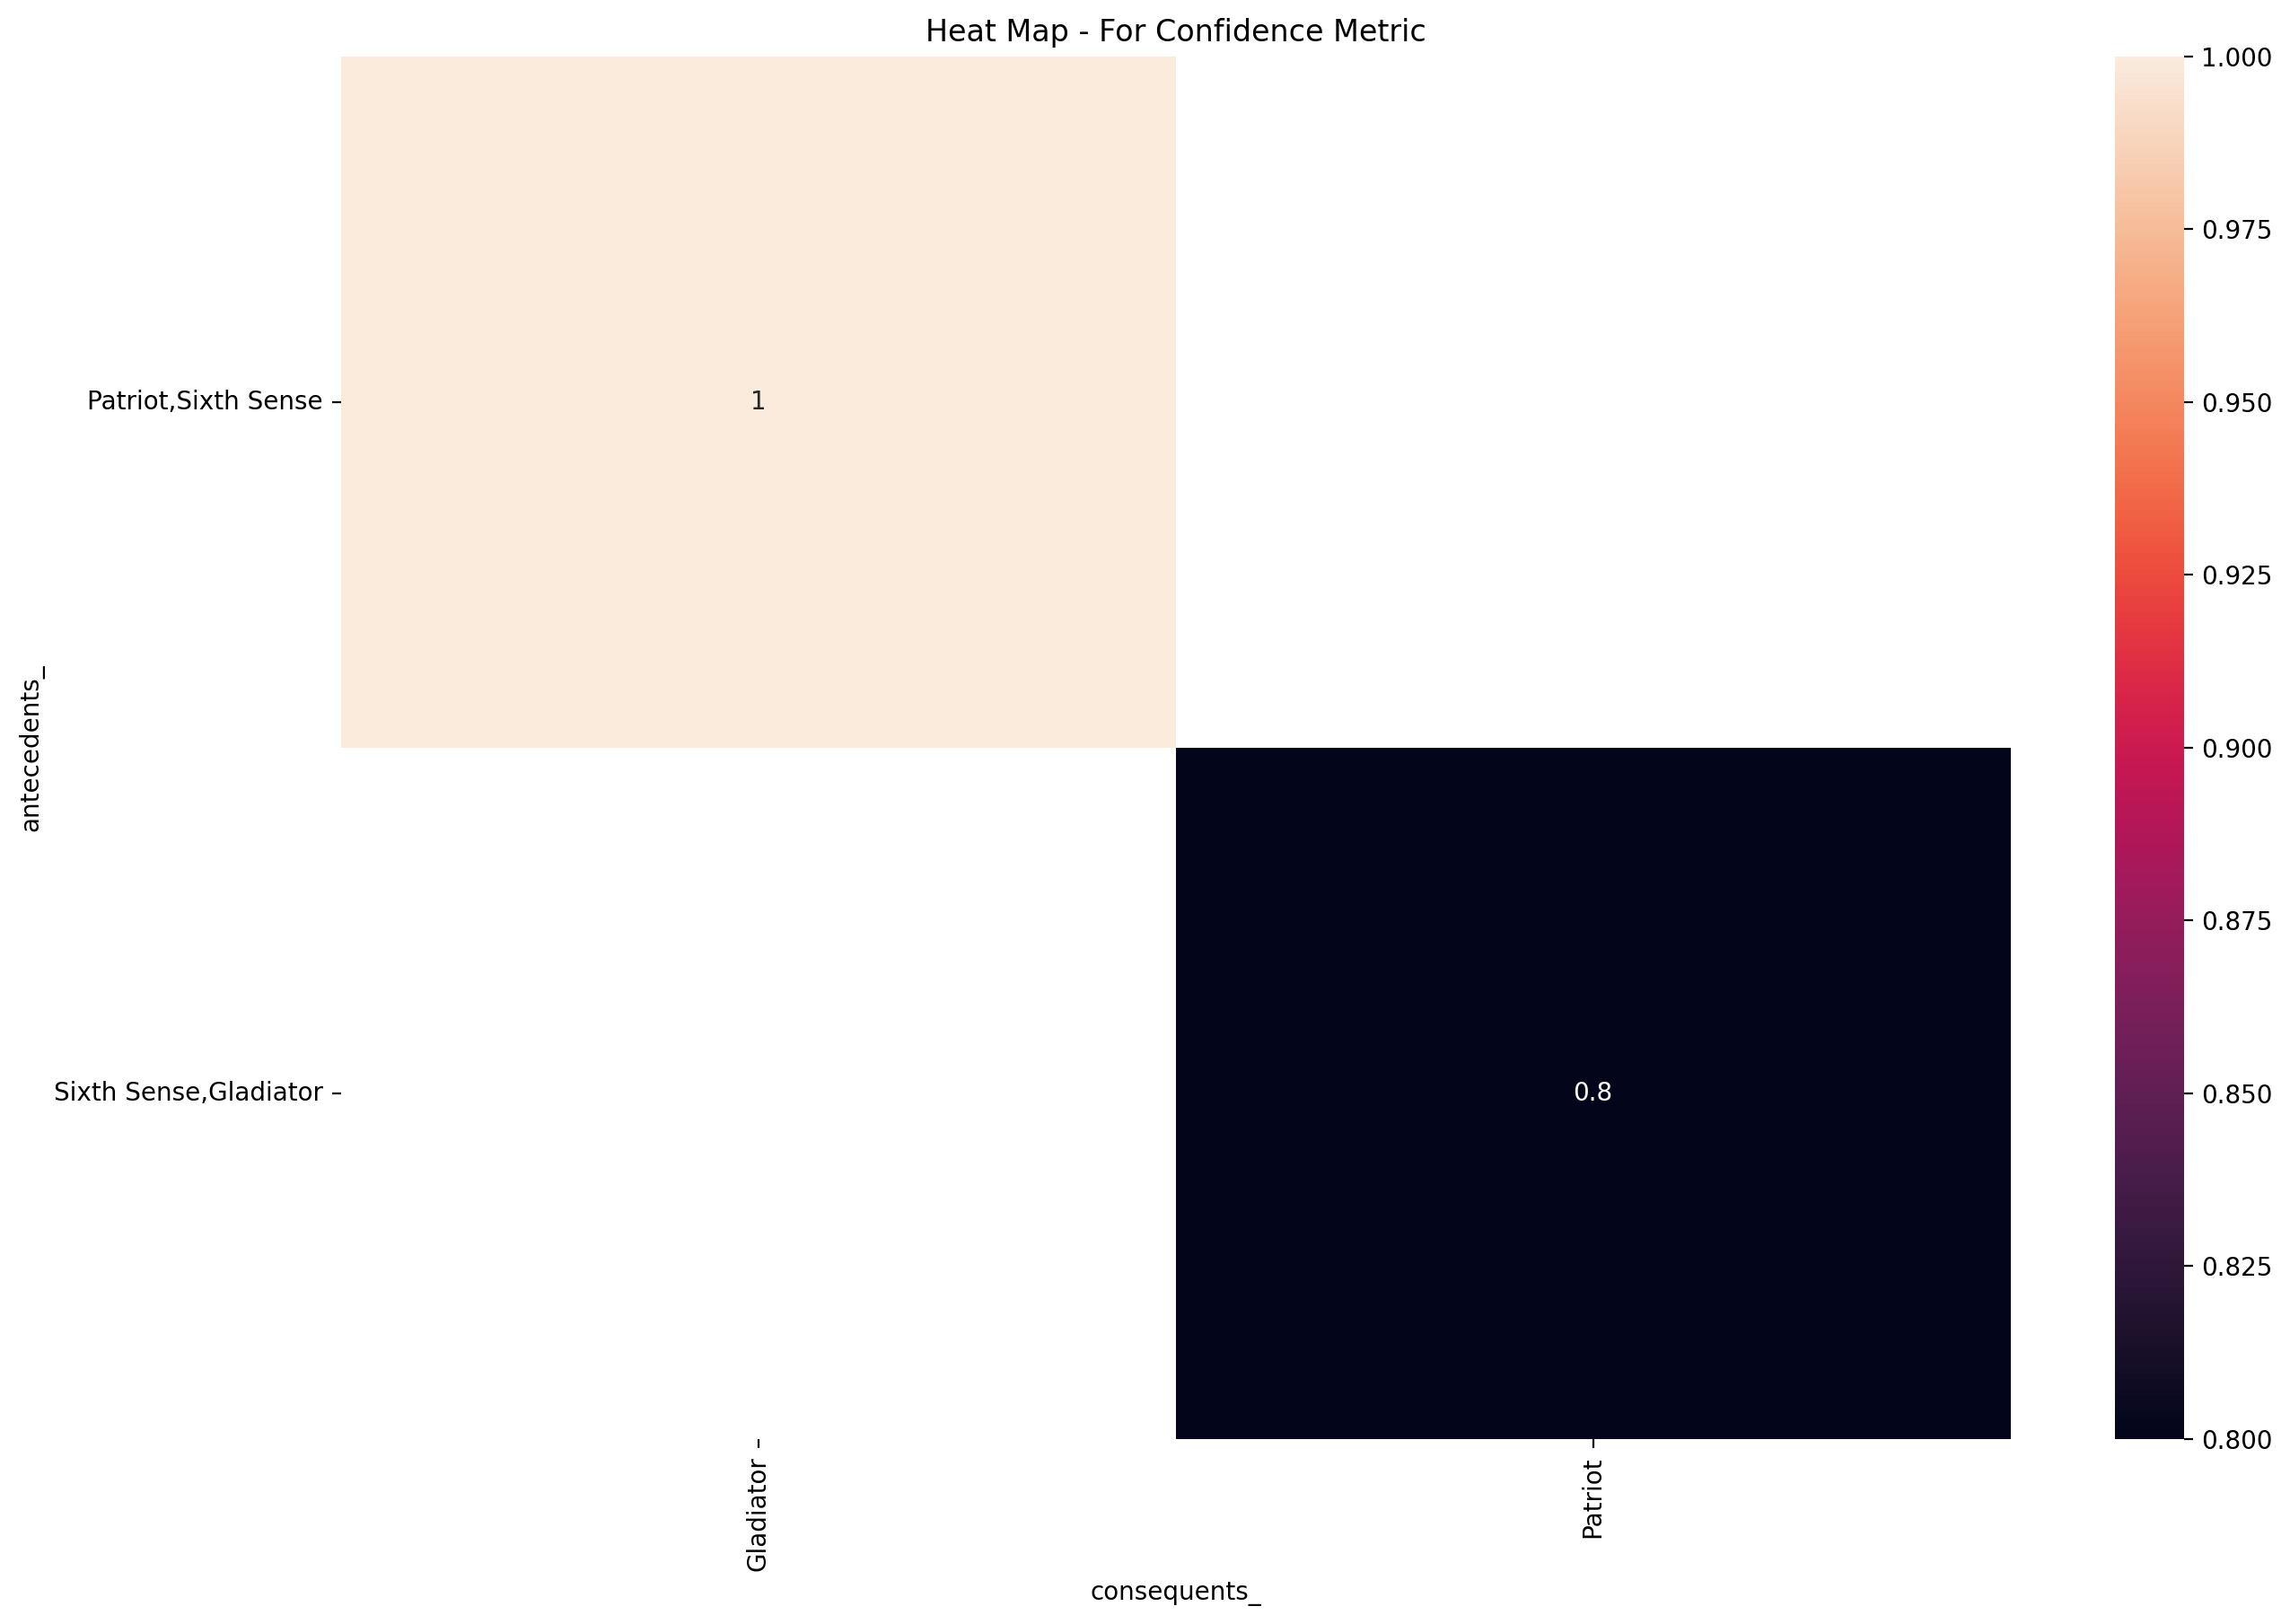

In [58]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

### FpGrowth Algorithm

**Set minimum support = 0.1**

In [59]:
frequent_itemsets_fp = fpgrowth(data,
                                min_support=0.1,
                                use_colnames=True,
                                verbose=1)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)


### Model Building

In [60]:
# Threshold = 0.2

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.2)
model

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
12  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
13                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
14             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
15               (Gladiator)    (Patriot, Sixth Sense)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.666667  1.111111      0.04         1.2  
12                 0.6      0.4    0.800000  1.333333      0.10         2.0  
13                 0.5      0.4    0.666667  1.333333      0.10         1.5  
14                 0.6      0.4    0.666667  1.111111      0.04         1.2  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [61]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False)

antecedents    consequents  antecedent support  \
10    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
12  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
11      (Patriot, Gladiator)  (Sixth Sense)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
10                 0.7      0.4    1.000000  1.428571      0.12         inf   
12                 0.6      0.4    0.800000  1.333333      0.10         2.0   
11                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    lhs items  
10          2  
12          2  
11          2

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

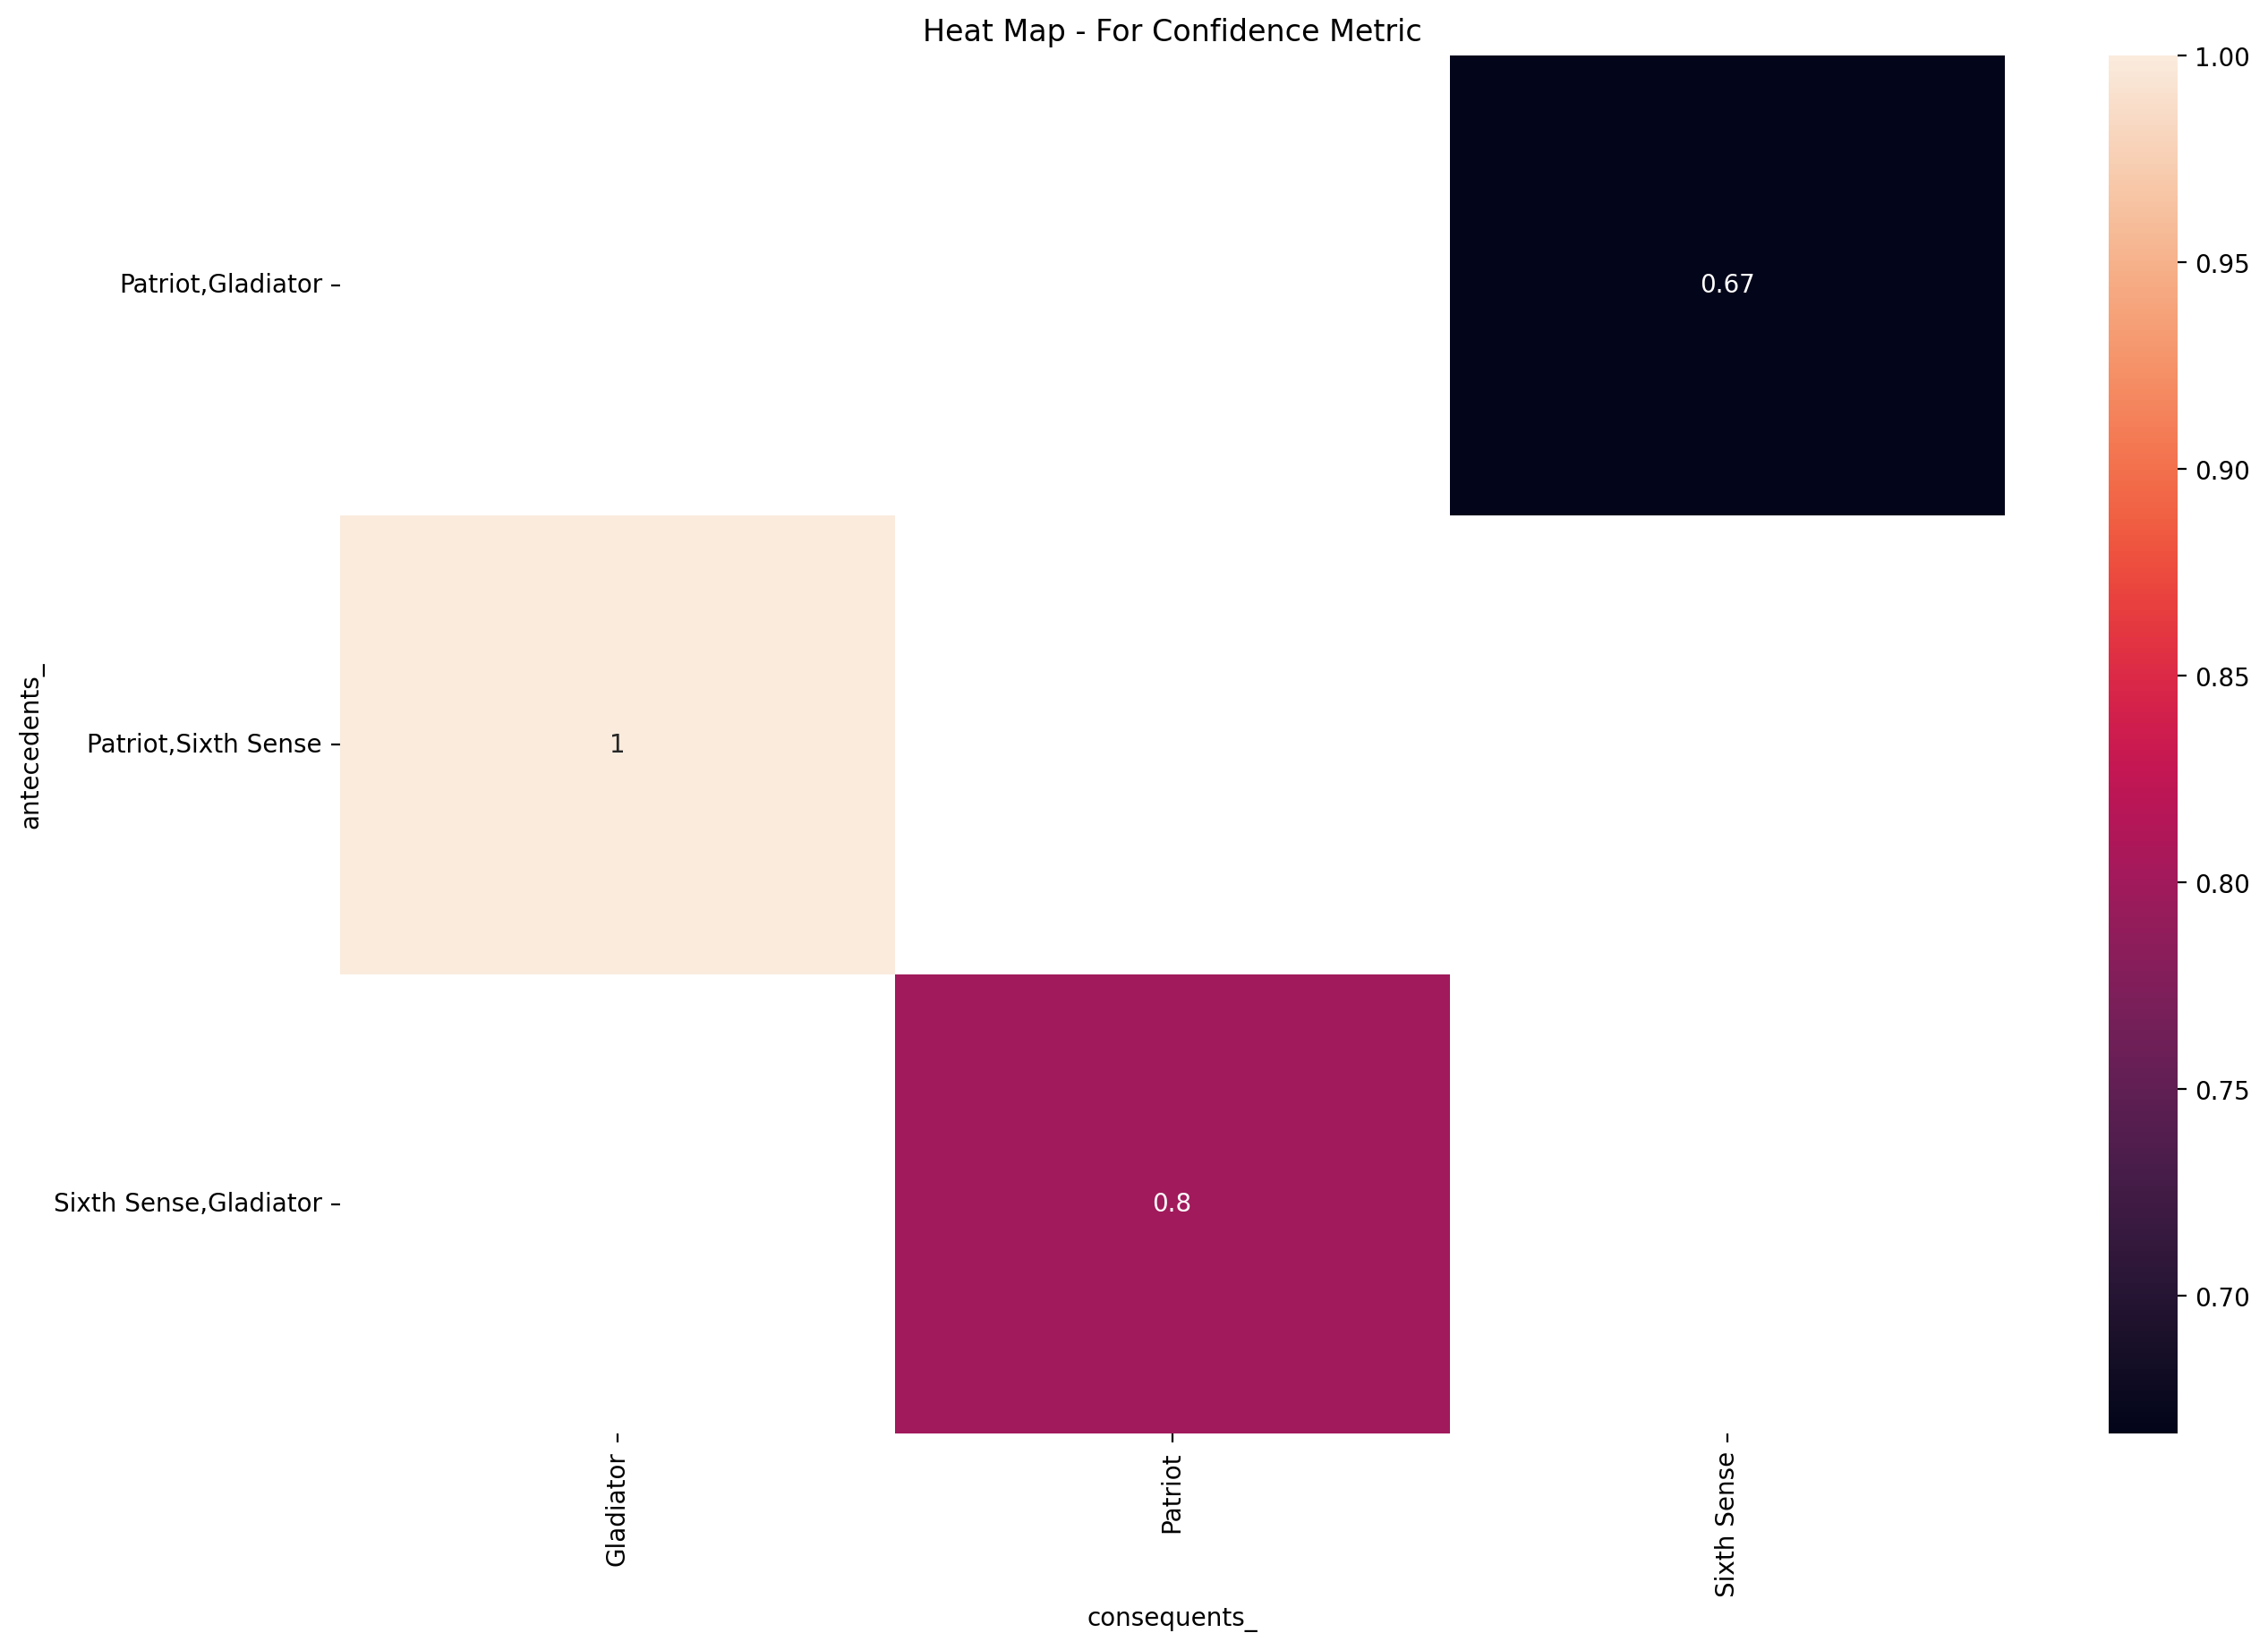

In [62]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [63]:
# Threshold = 0.6

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.6)
model

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                  (Patriot)               (Gladiator)                 0.6   
6                (Gladiator)                 (Patriot)                 0.7   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9     (Patriot, Sixth Sense)               (Gladiator)                 0.4   
10      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
12                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.7      0.6    1.000000  1.428571      0.18         inf  
6                  0.6      0.6    0.857143  1.428571      0.18         2.8  
7                  0.2      0.2    1.000000  5.000000      0.16         inf  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.7      0.4    1.000000  1.428571      0.12         inf  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
12                 0.5      0.4    0.666667  1.333333      0.10         1.5  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2

In [64]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False)

antecedents    consequents  antecedent support  \
9     (Patriot, Sixth Sense)    (Gladiator)                 0.4   
11  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
10      (Patriot, Gladiator)  (Sixth Sense)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
9                  0.7      0.4    1.000000  1.428571      0.12         inf   
11                 0.6      0.4    0.800000  1.333333      0.10         2.0   
10                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    lhs items  
9           2  
11          2  
10          2

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

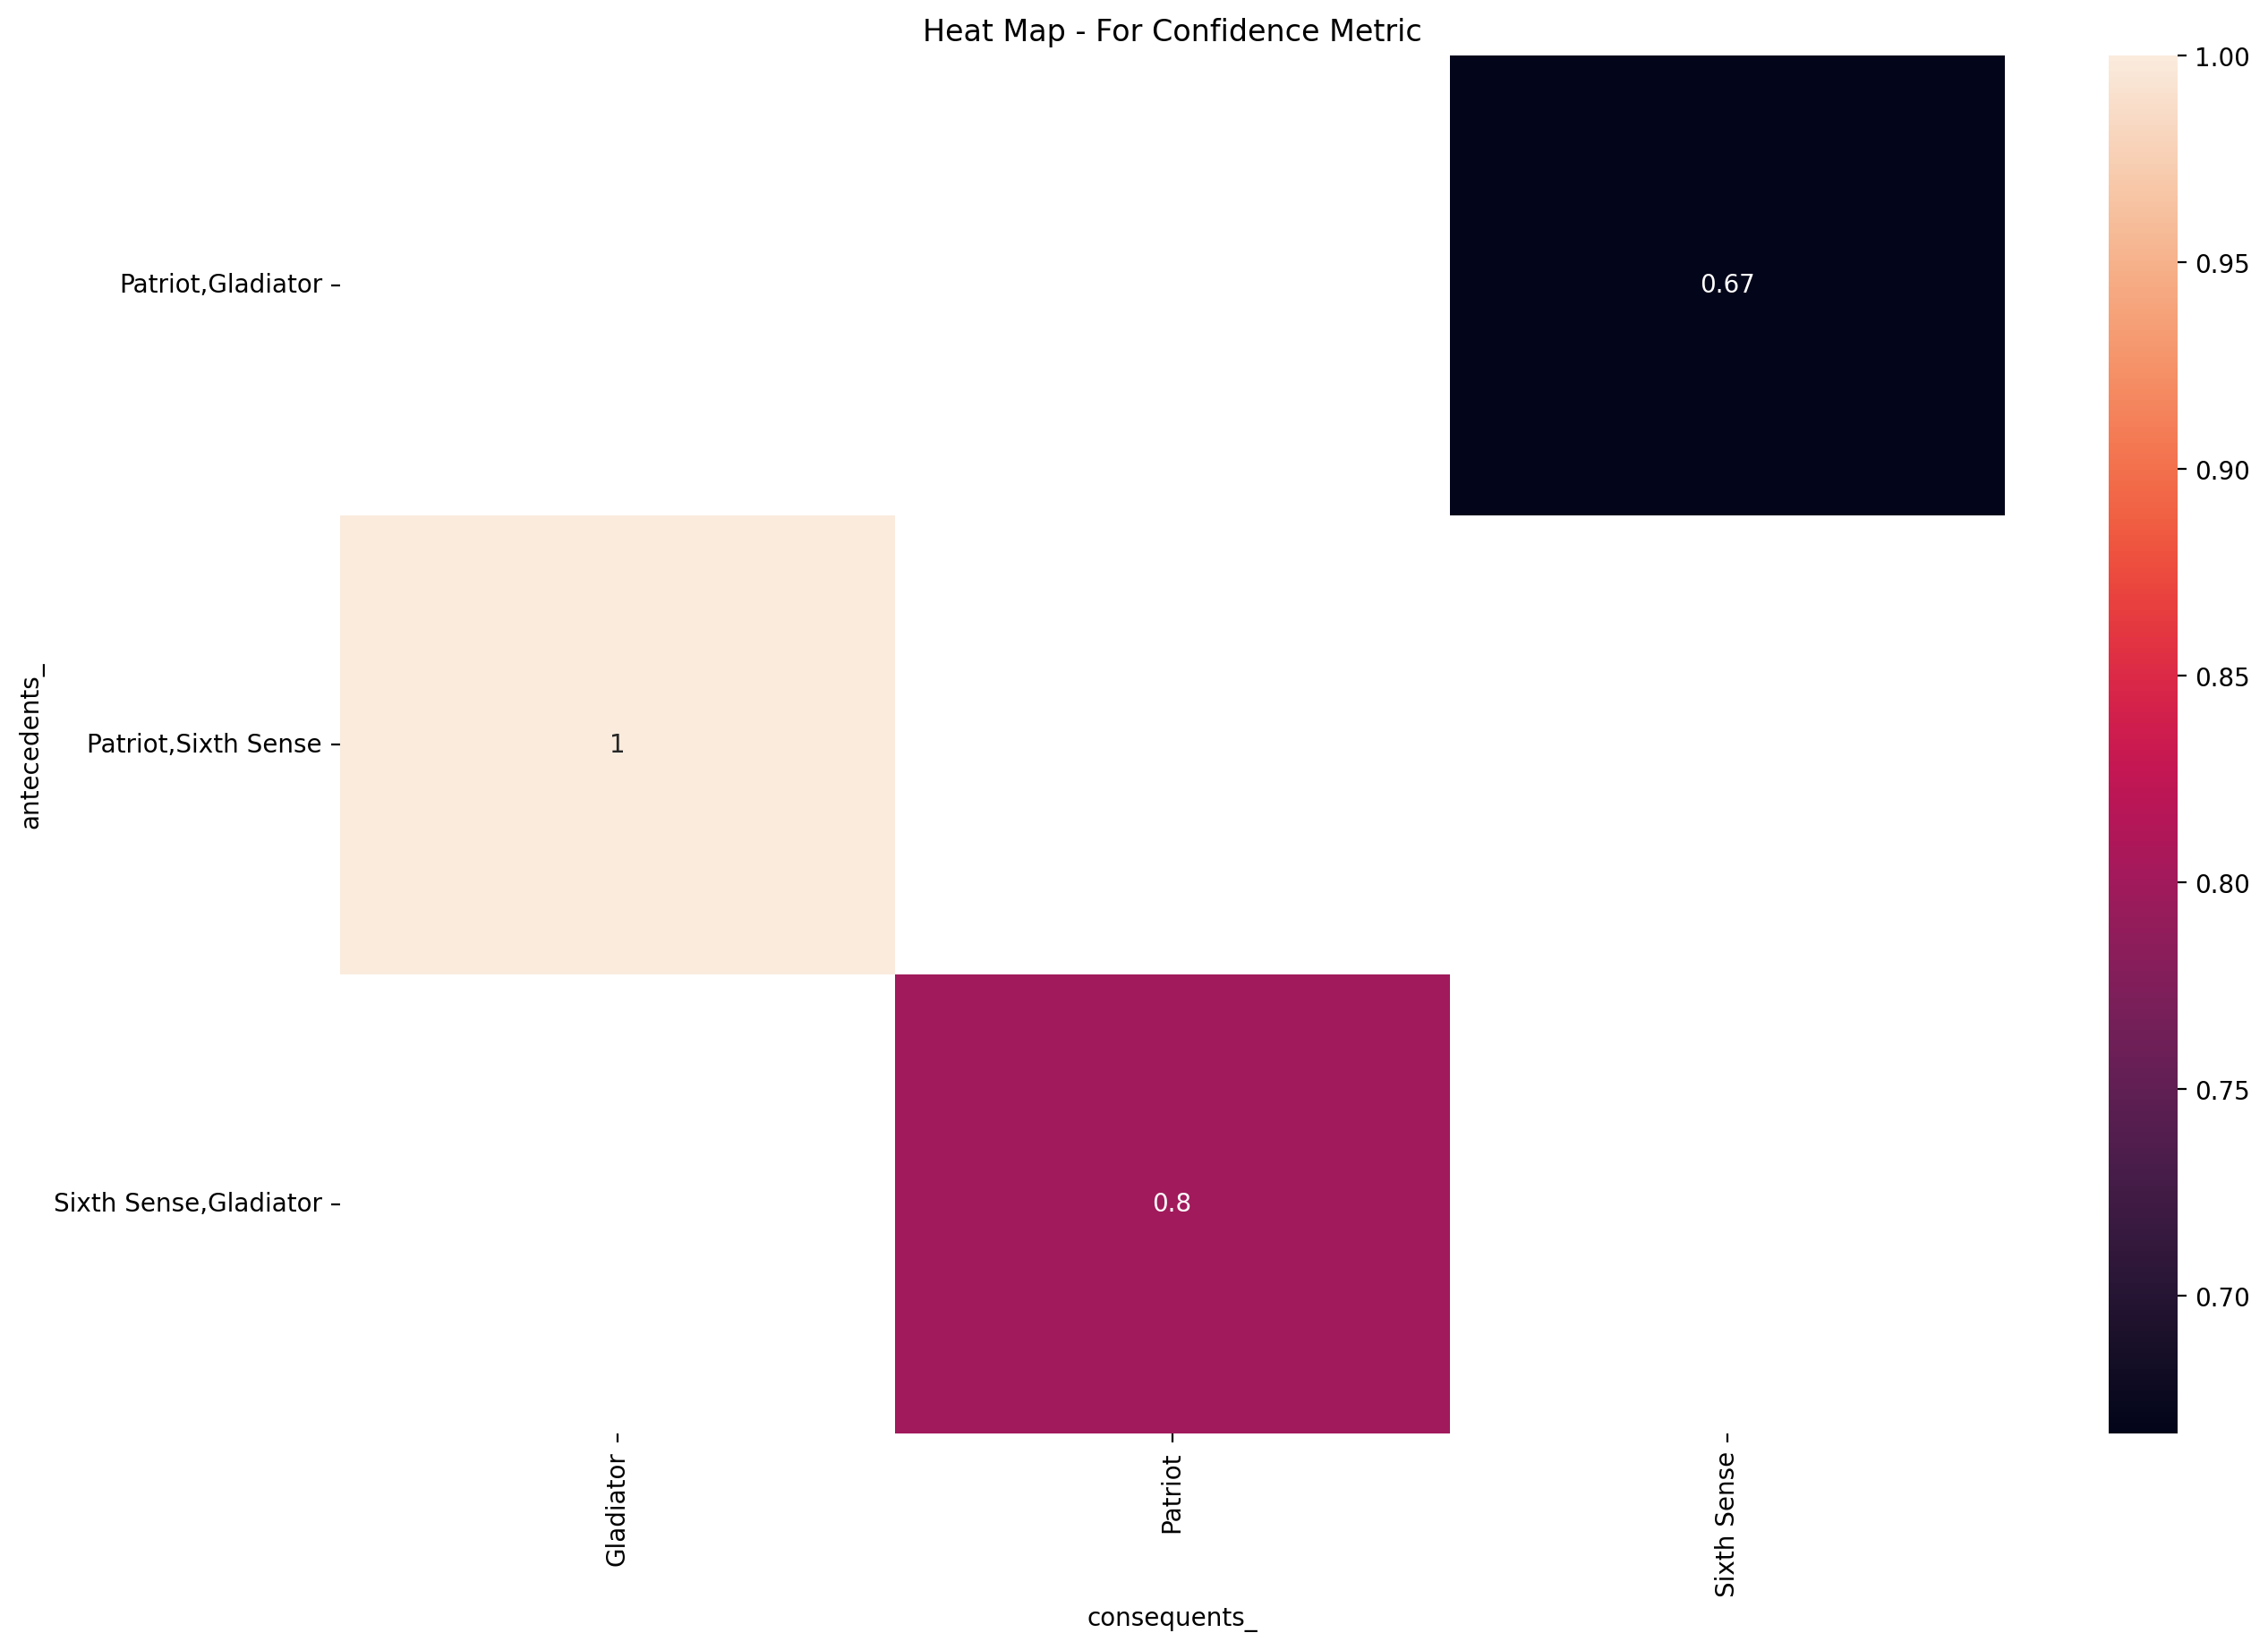

In [65]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [66]:
# Threshold = 0.8

model = association_rules(frequent_items,metric = 'confidence', min_threshold = 0.8)
model

antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1              (Green Mile)  (Sixth Sense)                 0.2   
2                 (Patriot)    (Gladiator)                 0.6   
3               (Gladiator)      (Patriot)                 0.7   
4                   (LOTR2)        (LOTR1)                 0.2   
5                   (LOTR1)        (LOTR2)                 0.2   
6    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
7  (Sixth Sense, Gladiator)      (Patriot)                 0.5   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.2    1.000000  1.666667      0.08         inf  
2                 0.7      0.6    1.000000  1.428571      0.18         inf  
3                 0.6      0.6    0.857143  1.428571      0.18         2.8  
4                 0.2      0.2    1.000000  5.000000      0.16         inf  
5                 0.2      0.2    1.000000  5.000000      0.16         inf  
6                 0.7      0.4    1.000000  1.428571      0.12         inf  
7                 0.6      0.4    0.800000  1.333333      0.10         2.0

In [67]:
model['lhs items'] = model['antecedents'].apply(lambda x:len(x) )
model[model['lhs items']>1].sort_values('lift', ascending=False)

antecedents  consequents  antecedent support  \
6    (Patriot, Sixth Sense)  (Gladiator)                 0.4   
7  (Sixth Sense, Gladiator)    (Patriot)                 0.5   

   consequent support  support  confidence      lift  leverage  conviction  \
6                 0.7      0.4         1.0  1.428571      0.12         inf   
7                 0.6      0.4         0.8  1.333333      0.10         2.0   

   lhs items  
6          2  
7          2

(array([0.5, 1.5]), [Text(0.5, 0, 'Gladiator'), Text(1.5, 0, 'Patriot')])

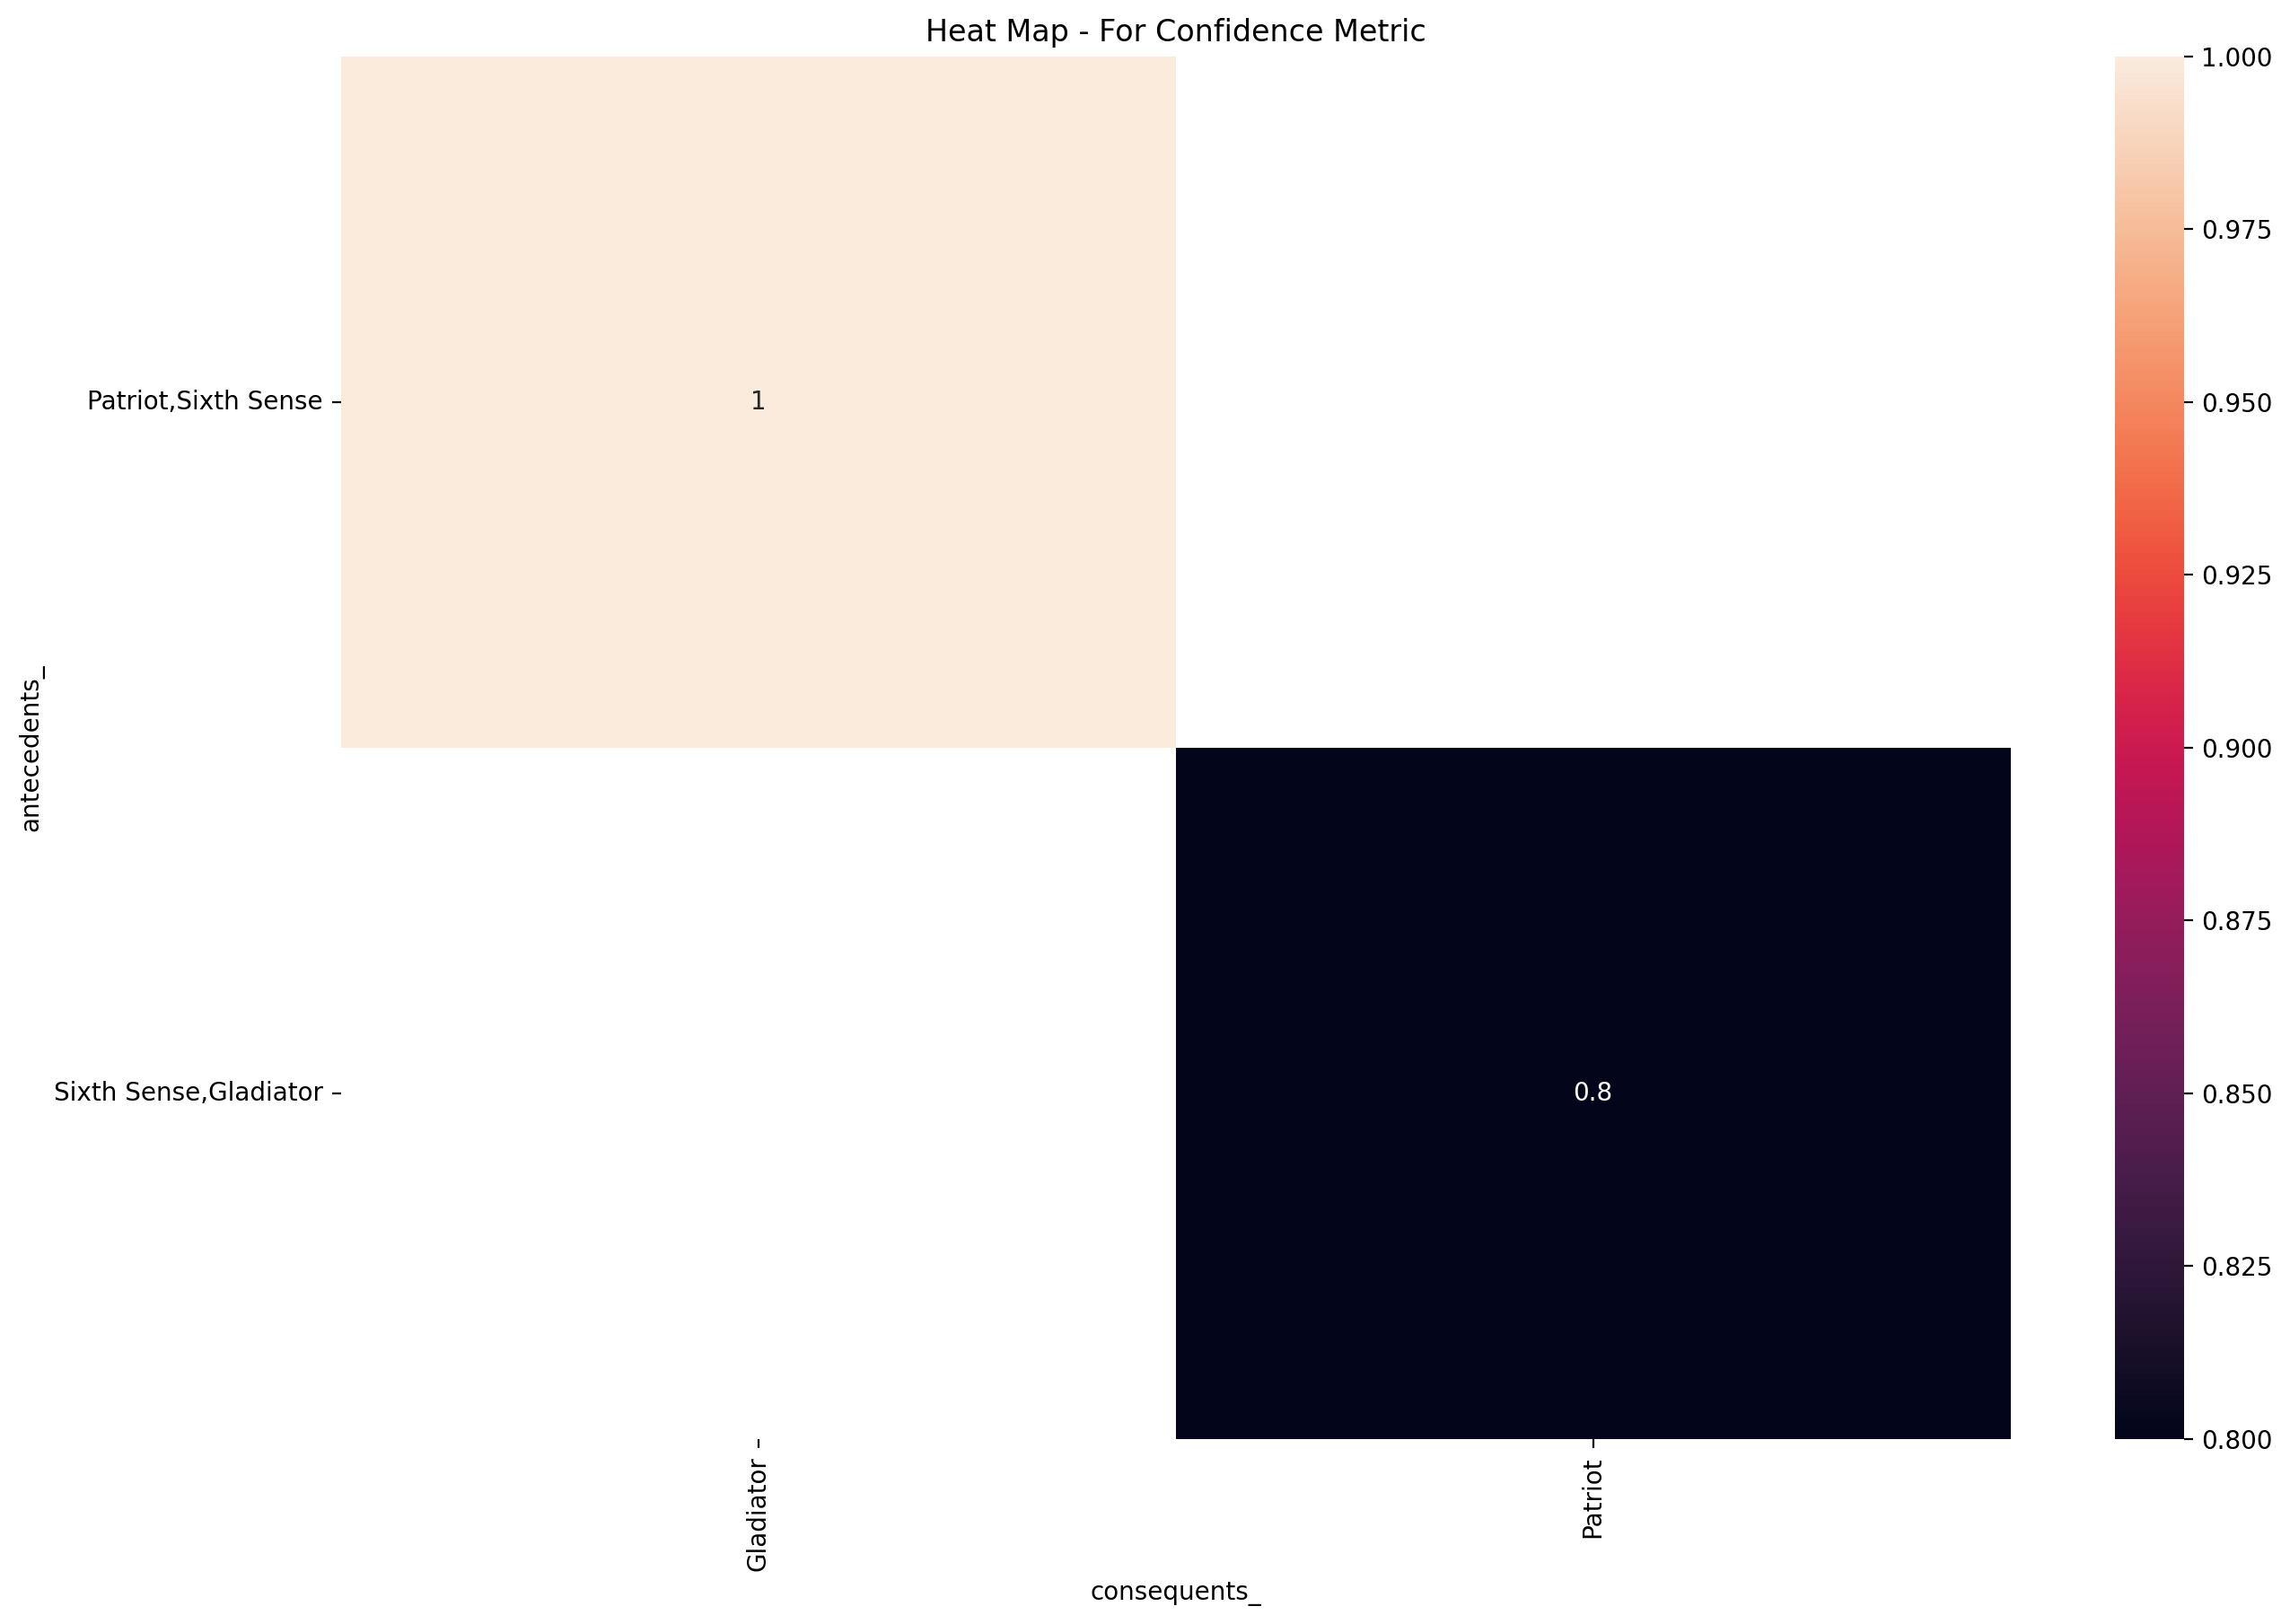

In [68]:
model['antecedents_'] = model['antecedents'].apply(lambda a: ','.join(list(a)))
model['consequents_'] = model['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = model[model['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)